#### Data Science General Assembly Capstone
#####  6 June 2017 , Eddie Pavel Arenas Sosa

# Is it possible to forecast WTI future oil prices using sentiment analysis from media? 

![Image of Yaktocat](https://s3-eu-west-1.amazonaws.com/openreply-enidays/wp-content/uploads/2016/02/OIL_chartJanuary2016.png)

#### Problem Statements:
Recognize, analyze, research and forecast trends in the WTI oil future intraday index price using sentiment analysis data.

#### Aim:
1. Determine whether there is a relationship between the oil market online news and the WTI future index price.
2. Define it is possible to forecast WTI future prices trends with sentiments of news.
3. Find possible outcomes or sources to predict WTI oil prices using sentiment analysis.
4. Evaluate the possibility to create an "oil sentiments dictionary" using a natural language processing (NPL) project.
5. Research for new data sources.

#### Executive summary: 
A sentiment analysis approach is related to the use of programming techniques to a body of text to describe the tonality of the document. Given the growth of user-generating contents around the world, a sentiment analysis valuation is becoming very useful to automatically characterize the overall feeling or mood of consumers and markets. 

This project or capstone is achieved by exploiting the power of data mining and machine learning and applied them to historical WTI oil prices and Thomson Reuters Sentiment analysis Historical Data. The object of this report is to research, evaluate and attempt to forecast WTI oil prices by using online news. Furthermore, is intended to provide the executive board with background information, techniques, and methodologies that assess the feasibility of sentiment analysis valuations that pair with traditional methods to forecast oil prices.

Crude oil is the world's leading fuel, and its prices have a significant impact on the economy. Forecast methodologies are extremely useful to governments, industries, and individuals. While many methods have been proposed to detect such interactions, oil prices forecasting, remains as one of the most challenge tasks, due to the inherent volatility. Nowadays, the obstacle is to capture those changing patterns and be able to readjust the model assumptions in real time.  The main factors to be considered include the use of accurate estimation, recognitions of trends, tendencies, and seasonalities, but also real-time adjustments actions, feasible through machine learning. Findings are promising and confirms first thoughts. In some extent is feasible to forecast oil price using sentiment data. However, the project will conclude for now (due to time constrain) but is open for further studies. 

#### Project Outline:
1. Realize and EDA (Exploratory Data Analysis)
2. Find relationship between variables
3. Choose the best predictive model
4. Execute the model, plot the insights and review the results
5. Try alternative models (Repeat step 3)
            Optional: Insert new data (Repeat step 1-3) 
6. Accept or reject the null hypothesis
7. Elaborate a conclusion and show insights through visual Softwares
            Optional: NPL project to develop a new dictionary able to display a new sentiment Data Set 

#### Models used :
1. Linear Regression (OLS)  
2. Logistic Regression (Logit)
3. Principal Component Analysis (PCA)
4. Sentiment Analysis: 
    1. Natural Language Toolkit
    2. Vader Sentiment Analysis 
6. Dickey-Fuller test
7. Time Series Analysis (Arimax Model)

#### Database
1. Sentiment Analysis data derived from news publications from 6000+ news portals (i.e. 4- Traders, Equities.com, CNBC, Bloomberg, Business week, Street Insider... ), financial blogs (i.e. ZeroHedge, Washington Post, Paul Krugman, Naked Capital …).
2. WTI future intraday index price series from 13 of May 2006 to 12 of April 2017
3. Liquid fuel oil balance world production and consumption per quarter. 

#### Data (pipeline) processes
Data extraction seems, at first glance, to be a relatively straightforward component of the project. In practice, the approach and outcomes became very significant, impacting negatively on the findings, especially due to the time constrain, budget constrain and lack of public data related to this field. The quantitative and qualitative data evaluated in this project might loss significance mainly because: 

1. Sentiment Analysis first dataset: 
    * EDA reveal big chunk of misinformation. 433 to 456 missing values, leading to possible misrepresentation of the sample. 
    *Categorical data is expected to yield grater inaccuracy.  
2. WTI oil price future index: 
    * EDA was an arduous process due to problem with the original data sources, leading through a long cleaning procedure. Accuracy intact. However, it became a challenge create a precise technique that allow me to update my data periodically.
    * Statistical associations may be misleading if important explanatory variables are not included in the analysis. 

#### First Dataset: 
1. Sentiment Analysis data derived from news publications from 6000+ news portals (i.e. 4- Traders, Equities.com, CNBC, Bloomberg, Business week, Street Insider... ), financial blogs (i.e. ZeroHedge, Washington Post, Paul Krugman, Naked Capital …).

In [1]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="white")

In [2]:
sent_test = '/Users/EddieArenas/desktop/Capstone/NS1-3GOK_GR.csv'
sent_test = pd.read_csv('/Users/EddieArenas/desktop/Capstone/NS1-3GOK_GR.csv')

In [3]:
#Understan and analyse the data set 
print (sent_test.shape)
sent_test.head()
#sent_test.dtypes

(1606, 6)


,Date,Sentiment,Sentiment High,Sentiment Low,News Volume,News Buzz
0,05/06/2017,0,0,0,0,0
1,04/06/2017,0,0,0,0,0
2,03/06/2017,0,0,0,0,0
3,02/06/2017,0,0,0,0,0
4,01/06/2017,-4,-2,-5,6,0


In [4]:
## Modife the Date column 
import datetime
sent_test['Date'] =  pd.to_datetime(sent_test['Date'], format='%d/%m/%Y')

In [5]:
sent_test.Date.head()

0   2017-06-05
1   2017-06-04
2   2017-06-03
3   2017-06-02
4   2017-06-01
Name: Date, dtype: datetime64[ns]

In [6]:
#Check
sent_test.head()
sent_test.dtypes

Date              datetime64[ns]
Sentiment                  int64
Sentiment High             int64
Sentiment Low              int64
News Volume                int64
News Buzz                  int64
dtype: object

In [7]:
# Rename columns with an a space in between 
sent_test = sent_test.rename(columns={'Sentiment High':'Sentiment_High','Sentiment Low':'Sentiment_Low',
                            'News Volume':'News_Volume','News Buzz':'News_Buzz'})
#Check
sent_test.columns

Index(['Date', 'Sentiment', 'Sentiment_High', 'Sentiment_Low', 'News_Volume',
       'News_Buzz'],
      dtype='object')

### Data Dictionary first database

In [8]:
##Create a Dictionary for the first DATASET "sent"
sent_dict = {
    'Sentiment':{
        'type':sent_test.Sentiment.dtype,
        'description':'Average sentiment value'
    },
    'Sentiment_High':{
        'type':sent_test.Sentiment_High.dtype,
        'description':'Maximum bullish sentiment'
    },
    'Sentiment_Low':{
        'type':sent_test.Sentiment_Low.dtype,
        'description':'Maximum bearish sentiment'
    },
    'News_Volume':{
        'type':sent_test.News_Volume.dtype,
        'description':'Amount of news in that day'
    },
    'News_Buzz':{
        'type':sent_test.News_Buzz.dtype,
        'description':'News Buzz'
    },'dataset_shape':sent_test.shape}

print(sent_dict)

{'Sentiment': {'type': dtype('int64'), 'description': 'Average sentiment value'}, 'Sentiment_High': {'type': dtype('int64'), 'description': 'Maximum bullish sentiment'}, 'Sentiment_Low': {'type': dtype('int64'), 'description': 'Maximum bearish sentiment'}, 'News_Volume': {'type': dtype('int64'), 'description': 'Amount of news in that day'}, 'News_Buzz': {'type': dtype('int64'), 'description': 'News Buzz'}, 'dataset_shape': (1606, 6)}


In [9]:
sent_test.head(8)
# Problem with missing informoation for some dates (ie. 2017-04-06)
# Rows with 0.0 

,Date,Sentiment,Sentiment_High,Sentiment_Low,News_Volume,News_Buzz
0,2017-06-05,0,0,0,0,0
1,2017-06-04,0,0,0,0,0
2,2017-06-03,0,0,0,0,0
3,2017-06-02,0,0,0,0,0
4,2017-06-01,-4,-2,-5,6,0
5,2017-05-31,-4,-1,-5,18,1
6,2017-05-30,-1,4,-5,25,2
7,2017-05-29,-4,-2,-5,24,2


In [10]:
# Decide to convert those 0.0 values into Nan (Null values)
sent_test = sent_test.replace({ 0 : np.nan })
sent_test.head(10)

,Date,Sentiment,Sentiment_High,Sentiment_Low,News_Volume,News_Buzz
0,2017-06-05,NaN,NaN,NaN,NaN,NaN
1,2017-06-04,NaN,NaN,NaN,NaN,NaN
2,2017-06-03,NaN,NaN,NaN,NaN,NaN
3,2017-06-02,NaN,NaN,NaN,NaN,NaN
4,2017-06-01,-4.0,-2.0,-5.0,6.0,NaN
5,2017-05-31,-4.0,-1.0,-5.0,18.0,1.0
6,2017-05-30,-1.0,4.0,-5.0,25.0,2.0
7,2017-05-29,-4.0,-2.0,-5.0,24.0,2.0
8,2017-05-28,-2.0,2.0,-5.0,4.0,3.0
9,2017-05-27,-5.0,-4.0,-5.0,8.0,6.0


In [11]:
#Looking for null values
sent_test.isnull().sum()

Date                0
Sentiment         497
Sentiment_High    497
Sentiment_Low     497
News_Volume       520
News_Buzz         514
dtype: int64

In [12]:
# Decide to interpolate null values 
# Interpolate method that performs linear interpolation at missing datapoints.
# There are other methods such as : 
# Method='quadratic' may be appropriate.
# Method='pchip' should work well.
# Method='akima'.

# https://pandas.pydata.org/pandas-docs/stable/missing_data.html

sent = sent_test.interpolate()

In [13]:
# Check 
print (sent.isnull().sum())
sent.head()

Date              0
Sentiment         4
Sentiment_High    4
Sentiment_Low     4
News_Volume       4
News_Buzz         5
dtype: int64


,Date,Sentiment,Sentiment_High,Sentiment_Low,News_Volume,News_Buzz
0,2017-06-05,NaN,NaN,NaN,NaN,NaN
1,2017-06-04,NaN,NaN,NaN,NaN,NaN
2,2017-06-03,NaN,NaN,NaN,NaN,NaN
3,2017-06-02,NaN,NaN,NaN,NaN,NaN
4,2017-06-01,-4.0,-2.0,-5.0,6.0,NaN


In [14]:
sent = sent.dropna()

In [15]:
sent.head()
print (sent.dtypes)

Date              datetime64[ns]
Sentiment                float64
Sentiment_High           float64
Sentiment_Low            float64
News_Volume              float64
News_Buzz                float64
dtype: object


In [16]:
#To CSV for a future reference.
sent.to_csv('sent_final2_capstone.csv')

In [17]:
# Create a Datetime procedure
sent.index = sent.Date
# Check
sent.head()

,Date,Sentiment,Sentiment_High,Sentiment_Low,News_Volume,News_Buzz
Date,,,,,,
2017-05-31,2017-05-31,-4.0,-1.0,-5.0,18.0,1.0
2017-05-30,2017-05-30,-1.0,4.0,-5.0,25.0,2.0
2017-05-29,2017-05-29,-4.0,-2.0,-5.0,24.0,2.0
2017-05-28,2017-05-28,-2.0,2.0,-5.0,4.0,3.0
2017-05-27,2017-05-27,-5.0,-4.0,-5.0,8.0,6.0


In [18]:
# Optional : If the data is downloaded for the first time by default Jupyter notebook might add 
# a column named "Unnamed:0" 
# Use the code below to drop it: 
# sent.drop(axis=1,labels='Unnamed: 0',inplace=True)

In [19]:
# Clean the datetime table, eliminating Date column, making it an index and eliminating the space. 
sent.drop(axis=1,labels='Date',inplace=True)
del sent.index.name

In [20]:
# Check 
print (sent.head(2))
print (sent.dtypes)
sent.isnull().sum()

            Sentiment  Sentiment_High  Sentiment_Low  News_Volume  News_Buzz
2017-05-31       -4.0            -1.0           -5.0         18.0        1.0
2017-05-30       -1.0             4.0           -5.0         25.0        2.0
Sentiment         float64
Sentiment_High    float64
Sentiment_Low     float64
News_Volume       float64
News_Buzz         float64
dtype: object


Sentiment         0
Sentiment_High    0
Sentiment_Low     0
News_Volume       0
News_Buzz         0
dtype: int64

In [21]:
# Now that we settled Date as my index we migh have missing dates (NaT)
# With the code below we create a New column to preserve the table and eliminate any possible NaT

sent["TMP"] = sent.index.values                # index is a DateTimeIndex
sent = sent[sent.TMP.notnull()]                  # remove all NaT values
sent.drop(["TMP"], axis=1, inplace=True)
# Check
sent.News_Buzz.head()

2017-05-31    1.0
2017-05-30    2.0
2017-05-29    2.0
2017-05-28    3.0
2017-05-27    6.0
Name: News_Buzz, dtype: float64

#### Perfom Visualizations :

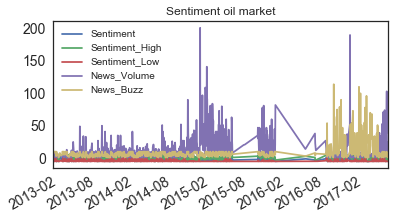

In [22]:
# Compiled plot of all the variables  
sent.plot(figsize=(6,3), title= 'Sentiment oil market', fontsize=14)
plt.show()

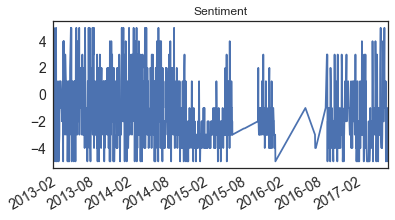

In [23]:
# Plot of Sentiment 
sent.Sentiment.plot(figsize=(6,3), title= 'Sentiment', fontsize=14)
plt.show()

In [24]:
### Problem:
# Found big gaps in date 2015 and 2016, the reason is the big amount of missing values and information 
# Interpolate did the job but instead fill the rows with values that are fictionals and create stable trends
# Those trends are a problem because my data is higly volatile (interpolation eliminated this volatility)

In [25]:
# Working with this dataset : 
# Run a correlation for Sentiment (sort it ascending) 
mean_corr_sent = sent.corr()
mean_corr_sent['Sentiment'].sort_values(ascending=False)

Sentiment         1.000000
Sentiment_High    0.821102
Sentiment_Low     0.762408
News_Buzz        -0.098577
News_Volume      -0.300807
Name: Sentiment, dtype: float64

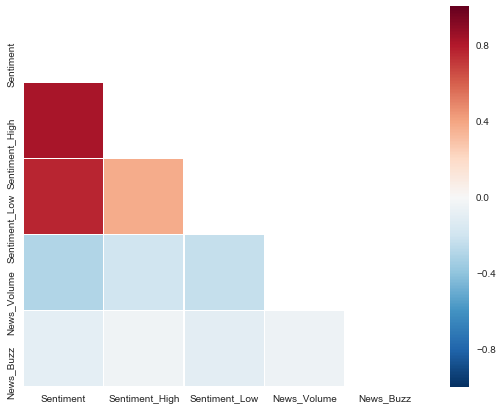

In [26]:
# Correlation Heatmap : 

# Set the default matplotlib figure size:
fig, ax = plt.subplots(figsize=(9,7))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(mean_corr_sent, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(mean_corr_sent, mask=mask, ax=ax,linewidths=.5)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

In [27]:
import scipy.stats  as stats

In [28]:
#Double Check with Scipy.stats: 
print ("Correlation Sentiment_High and Sentiment:",stats.pearsonr(sent['Sentiment'], sent['Sentiment_High']))
print ("Correlation Sentiment_Low and Sentiment:",stats.pearsonr(sent['Sentiment'], sent ['Sentiment_Low']))
print ("Correlation News_Volume and Sentiment:",stats.pearsonr(sent['Sentiment'], sent['News_Volume']))
print ("Correlation News_Buzz and Sentiment:",stats.pearsonr(sent['Sentiment'], sent ['News_Buzz']))

Correlation Sentiment_High and Sentiment: (0.8211019427580678, 0.0)
Correlation Sentiment_Low and Sentiment: (0.76240802461882606, 1.4360848727596793e-304)
Correlation News_Volume and Sentiment: (-0.30080684038541278, 7.7189165480995116e-35)
Correlation News_Buzz and Sentiment: (-0.098577182408739805, 7.7869378985453611e-05)


#### Plot insighs: 
1. The printouts and plot indicate that the correlation coefficients between the variable 'Sentiment'and the variables 'Sentiment_Low' 'Sentiment_High' are highly significantly (As we expected). 
2. Also indicate that the correlation coefficients between the variable 'Sentiment'and the variables 'News_Volume' 'News Buzz' are not significant (As we expected).

In [29]:
### Interpolation lack of volatility (fictional data) solution attemp : 

In [30]:
# Resampling my model by the mean per month it might help to solve this issue until certain point: 
sent_month = sent.resample('MS').mean()
sent_month = sent_month.fillna(sent_month.bfill())

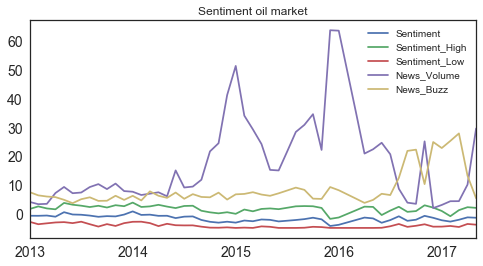

In [31]:
# Compiled plot of all the variables 
sent_month.plot(figsize=(8,4), title= 'Sentiment oil market', fontsize=14)
plt.show()

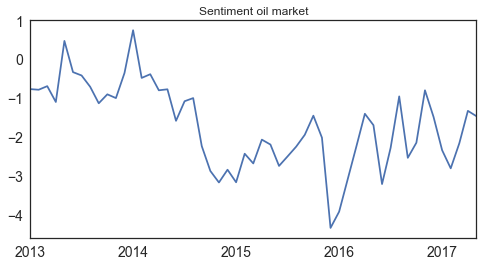

In [32]:
# Plot of Sentiment 
sent_month.Sentiment.plot(figsize=(8,4), title= 'Sentiment oil market', fontsize=14)
plt.show()

In [33]:
# We can see an improvement
# However, it still have a problem on 2016 

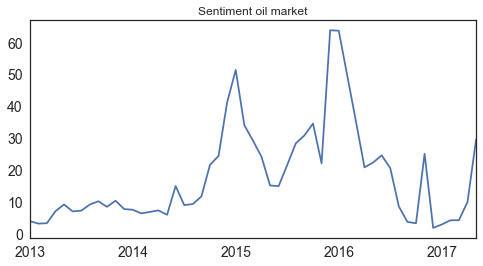

In [34]:
# Plot of News Volume
sent_month.News_Volume.plot(figsize=(8,4), title= 'Sentiment oil market', fontsize=14)
plt.show()

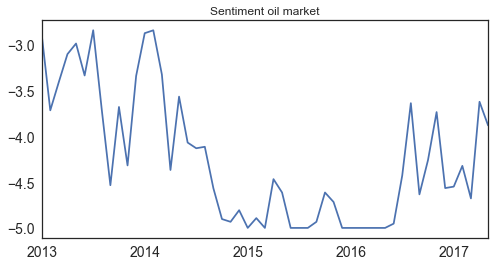

In [35]:
# Plot of Sentiment low 
sent_month.Sentiment_Low.plot(figsize=(8,4), title= 'Sentiment oil market', fontsize=14)
plt.show()

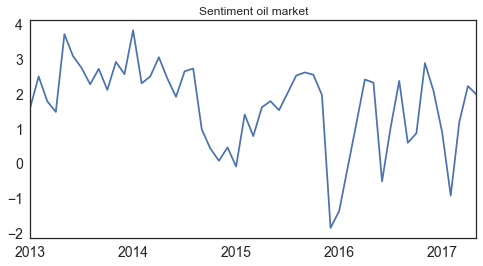

In [36]:
# # Plot of Sentiment High 
sent_month.Sentiment_High.plot(figsize=(8,4), title= 'Sentiment oil market', fontsize=14)
plt.show()

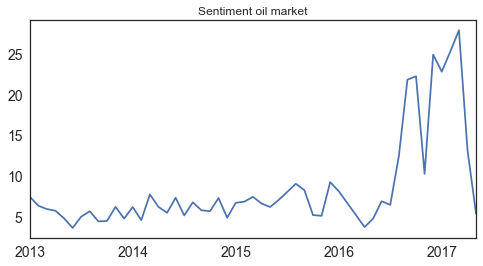

In [37]:
# Plot of News Buzz
sent_month.News_Buzz.plot(figsize=(8,4), title= 'Sentiment oil market', fontsize=14)
plt.show()

#### Insights:
1. Negative sentiment from 2015 to mid 2016 it have a counterpart in the news volume for those dates. It explain the big repercution in news to the huge decline in oil prices.  
2. Sentiment High reach its minimum in 2016 (Oil market sentiment is completly negative) 
3. Buzz scores are normalized values of change in standard deviations of periodic news volume. Buzz scores reflect a sharp change in news volume thus serving as a risk alert indicator. Defined on a scale of 1-10 high buzz score reflects higher volatility. News buzz peak since the mid of 2016 to 2017, is a refletion of the current state of alert in the market to oil markets. 

### Time Serie Analysis for Sentiment 
Time Series advantages
1.    Is very useful to find temporal effects. 
2.    Tuning is very hard. However, it is a fascinating way to understand events.  

Time Series disadvantages
1.    Time series methods comprehend different areas of statistics. It required experience and knowledge. 
2.    Most machine learning algorithms don’t deal well with time. 

##### The first of the time series in this capstone
##### Understand and predict oil market sentiment (next month or maybe years). 

In [38]:
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

/Users/EddieArenas/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [39]:
# Create a new Table with Sentiment and Date (Index)
y= sent_month['Sentiment']

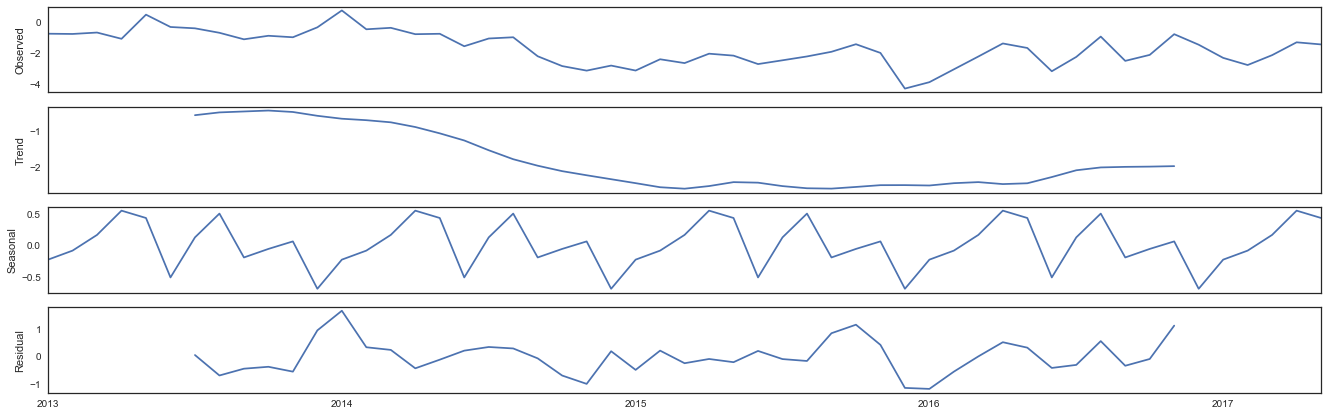

In [40]:
# Descomposition method it allow me to reflex seasonal, trend, and resid attributes.
# Note: This is a naive decomposition. More sophisticated methods might be preferred.

# The seasonal component is first removed by applying a convolution
# filter to the data. The average of this smoothed series for each
# period is the returned seasonal component.

# See: http://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

decomposition = seasonal_decompose(y, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(20, 6)
plt.show()

#### Search for Stationarity 
    1. Dickey-Fuller test

##### Dickey-Fuller test defined: 
Named for American statisticians David Dickey and Wayne Fuller who developed the test in 1979, the Dickey-Fuller test is used to determine whether a unit root, a feature that can cause issues in statistical inference, is present in an autoregressive model. The formula is appropriate for trending time series like asset prices. It is the simplest approach to test for a unit root, but most economic and financial times series have a more complicated and dynamic structure than can be captured by a simple autoregressive model, which is where the augmented Dickey-Fuller test comes into play.
Reference: https://www.thoughtco.com/the-augmented-dickey-fuller-test-1145985

Notes: 
1. Usually null is rejected when the p-value is less than or equal to a specified significance level, often 0.05 (5%), or 0.01 (1%) and even 0.1 (10%).
2. Also if the test statistic is smaller (in absolute value) than the 10% critical value you could reject the null and claim that your variable is stationary. 


In [41]:
from statsmodels.tsa.stattools import adfuller

In [42]:
# define Dickey-Fuller test
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12, center=False).mean()
    rolstd = timeseries.rolling(window=12, center=False).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

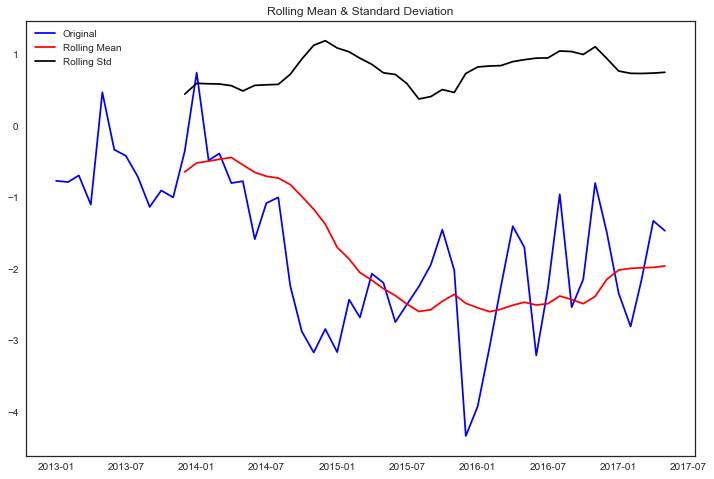

Results of Dickey-Fuller Test:
Test Statistic                 -2.038601
p-value                         0.269909
#Lags Used                      2.000000
Number of Observations Used    50.000000
Critical Value (1%)            -3.568486
Critical Value (5%)            -2.921360
Critical Value (10%)           -2.598662
dtype: float64


In [43]:
# perform test
YBS= y
test_stationarity(YBS)

In [44]:
# P-value > Critical Values 1%, 5%, 10%
# Test Statistic > Critical Values 1%, 5%, 10%
# Fail to reject the null hypothesis

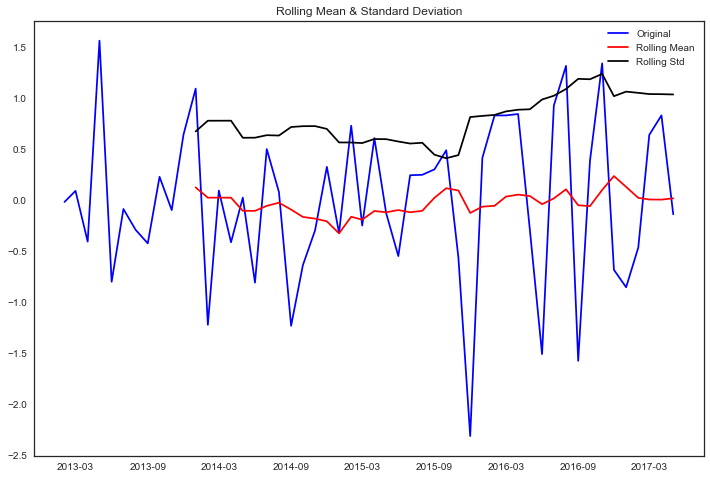

Results of Dickey-Fuller Test:
Test Statistic                -7.301103e+00
p-value                        1.337958e-10
#Lags Used                     1.000000e+00
Number of Observations Used    5.000000e+01
Critical Value (1%)           -3.568486e+00
Critical Value (5%)           -2.921360e+00
Critical Value (10%)          -2.598662e+00
dtype: float64


In [45]:
# Seccond try using the first difference: 

# first difference
y['first_difference'] = y - y.shift(1)  
test_stationarity(y.first_difference.dropna(inplace=False))
YD = y['first_difference']

In [46]:
# Test Statistic < Critical Values 1%, 5%, 10%
# Reject the null hypothesis
# Found Stationarity

In [47]:
# Create a new table to eliminate posibles null values in Dates 
YD.head()

2013-01-01         NaN
2013-02-01   -0.016484
2013-03-01    0.092166
2013-04-01   -0.406452
2013-05-01    1.567742
Freq: MS, Name: Sentiment, dtype: float64

In [48]:
# Code below eliminate null values 
# Print head and tail for later research
yt = YD.fillna(YD.bfill())
print (yt.head())
print (yt.tail())

2013-01-01   -0.016484
2013-02-01   -0.016484
2013-03-01    0.092166
2013-04-01   -0.406452
2013-05-01    1.567742
Freq: MS, Name: Sentiment, dtype: float64
2017-01-01   -0.854839
2017-02-01   -0.464862
2017-03-01    0.642281
2017-04-01    0.833704
2017-05-01   -0.137931
Freq: MS, Name: Sentiment, dtype: float64


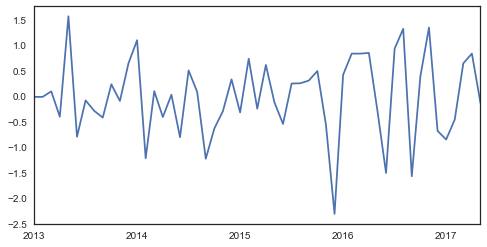

In [49]:
# Stationarity plot 
yt.plot(figsize=(8, 4))
plt.show()

#### Arima model Time Serie: 
ARIMA forecasting model is the general forecasting model which is used for forecasting time series . It can be made to be stationary by differencing whenever required. If the statistical properties of the variable are constant over the time means that a random variable that is a time series is stationary.
A stationary series do not have a trend. Series has a constant amplitude and its movements are done in a consistent manner. For example, its short-term patterns, which are random do look the same in a statistical sense. Its autocorrelations( which are correlations with its own deviations from the mean) do remain constant over time.
Also, a random variable consists of a combination of signal and noise. Signal could be a pattern of somehow fast or slow mean reversion and it could also have some seasonal components.
In other words, ARIMA model is a filter model that is separating signal from the noise, whereas signal is transformed int the future to obtain.
Reference : https://people.duke.edu/~rnau/411arim.htm

In [50]:
import itertools

In [51]:
# Reference: http://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html
# The (P,D,Q,s) order of the seasonal component of the model for the AR parameters, differences, 
# MA parameters, and periodicity. 
# Notes : 
# "d" must be an integer indicating the integration order of the process, 
# "p" and "q" may either be an integers indicating the AR and MA orders (so that all lags up to those 
# orders are included) or else iterables giving specific AR and / or MA lags to include. 
# "s" is an integer giving the periodicity (number of periods in season), often it is 4 for quarterly data 
# or 12 for monthly data. 

p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)


In [52]:
import warnings

In [53]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
mydf =pd.DataFrame(columns=['col1','col2'])
i=0
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(yt,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            mydf.loc[i] = 'ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic), results.aic
            i += 1
        except:
            continue
mydf.iloc[mydf.col2.idxmin]

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:100.90354557153222
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1147.7619199081548
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:103.81879021187473
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:102.53002613668947
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:83.72171124469683
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1159.652302630133
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:59.945044756109475
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:79.83976290734844
ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:79.26653285810892
ARIMA(0, 0, 0)x(2, 1, 0, 12)12 - AIC:48.295484120949695
ARIMA(0, 0, 0)x(2, 1, 1, 12)12 - AIC:49.6228079874697
ARIMA(0, 0, 0)x(2, 2, 0, 12)12 - AIC:20.380846239201205
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:122.91904969232068
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:98.89807429268589
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:115.51220512930173
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1158.1613546562917
ARIMA(0, 0, 1)x(0, 2, 0, 12)12 - AIC:108.66181167519252
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:104.96038289583356

ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:82.59252519749793
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:771.8587257588498
ARIMA(1, 0, 1)x(1, 2, 0, 12)12 - AIC:60.54199937063435
ARIMA(1, 0, 1)x(2, 0, 0, 12)12 - AIC:73.47903093637109
ARIMA(1, 0, 1)x(2, 0, 1, 12)12 - AIC:72.9132278040536
ARIMA(1, 0, 1)x(2, 1, 0, 12)12 - AIC:48.18541430830838
ARIMA(1, 0, 1)x(2, 1, 1, 12)12 - AIC:48.67783977735411
ARIMA(1, 0, 1)x(2, 2, 0, 12)12 - AIC:9.641593642688992
ARIMA(1, 0, 2)x(0, 0, 0, 12)12 - AIC:116.78793415103038
ARIMA(1, 0, 2)x(0, 0, 1, 12)12 - AIC:91.27848536539365
ARIMA(1, 0, 2)x(0, 1, 0, 12)12 - AIC:112.15549509323222
ARIMA(1, 0, 2)x(0, 1, 1, 12)12 - AIC:766.6207241896489
ARIMA(1, 0, 2)x(0, 2, 0, 12)12 - AIC:106.89257905044082
ARIMA(1, 0, 2)x(1, 0, 0, 12)12 - AIC:96.15060267099715
ARIMA(1, 0, 2)x(1, 0, 1, 12)12 - AIC:93.03872131427119
ARIMA(1, 0, 2)x(1, 1, 0, 12)12 - AIC:82.31904929388295
ARIMA(1, 0, 2)x(1, 1, 1, 12)12 - AIC:762.152372079266
ARIMA(1, 0, 2)x(1, 2, 0, 12)12 - AIC:60.565488323308045
ARIMA(1,

ARIMA(2, 0, 2)x(1, 0, 1, 12)12 - AIC:92.87252020675143
ARIMA(2, 0, 2)x(1, 1, 0, 12)12 - AIC:78.71126347865874
ARIMA(2, 0, 2)x(1, 1, 1, 12)12 - AIC:877.7593615080165
ARIMA(2, 0, 2)x(1, 2, 0, 12)12 - AIC:56.72576415017526
ARIMA(2, 0, 2)x(2, 0, 0, 12)12 - AIC:65.39183521338677
ARIMA(2, 0, 2)x(2, 0, 1, 12)12 - AIC:65.25935103678813
ARIMA(2, 0, 2)x(2, 1, 0, 12)12 - AIC:42.702530352028134
ARIMA(2, 0, 2)x(2, 1, 1, 12)12 - AIC:43.08144081532002
ARIMA(2, 0, 2)x(2, 2, 0, 12)12 - AIC:-15.038393432992038
ARIMA(2, 1, 0)x(0, 0, 0, 12)12 - AIC:143.05923000921752
ARIMA(2, 1, 0)x(0, 0, 1, 12)12 - AIC:113.05594474934692
ARIMA(2, 1, 0)x(0, 1, 0, 12)12 - AIC:132.5985745588896
ARIMA(2, 1, 0)x(0, 1, 1, 12)12 - AIC:1036.2302871137852
ARIMA(2, 1, 0)x(0, 2, 0, 12)12 - AIC:120.76624609417672
ARIMA(2, 1, 0)x(1, 0, 0, 12)12 - AIC:111.41226591761094
ARIMA(2, 1, 0)x(1, 0, 1, 12)12 - AIC:113.10610717420451
ARIMA(2, 1, 0)x(1, 1, 0, 12)12 - AIC:90.87242851399387
ARIMA(2, 1, 0)x(1, 1, 1, 12)12 - AIC:1043.1192217812943


col1    ARIMA(1, 1, 0)x(2, 2, 0, 12)12 - AIC:-35.46560...
col2                                             -35.4656
Name: 185, dtype: object

In [55]:
# Decide to use : ARIMA(1, 1, 2)x(1, 2, 0, 12)12

mod = sm.tsa.statespace.SARIMAX(yt,
                                order=(2, 1, 2),
                                seasonal_order=(1, 2, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5562      0.714     -0.779      0.436      -1.956       0.843
ar.L2         -0.0833      0.495     -0.168      0.866      -1.054       0.888
ma.L1         -0.1386   5951.958  -2.33e-05      1.000   -1.17e+04    1.17e+04
ma.L2         -0.8615   5126.892     -0.000      1.000      -1e+04       1e+04
ar.S.L12      -0.7489      0.224     -3.350      0.001      -1.187      -0.311
sigma2         1.6403   9762.809      0.000      1.000   -1.91e+04    1.91e+04


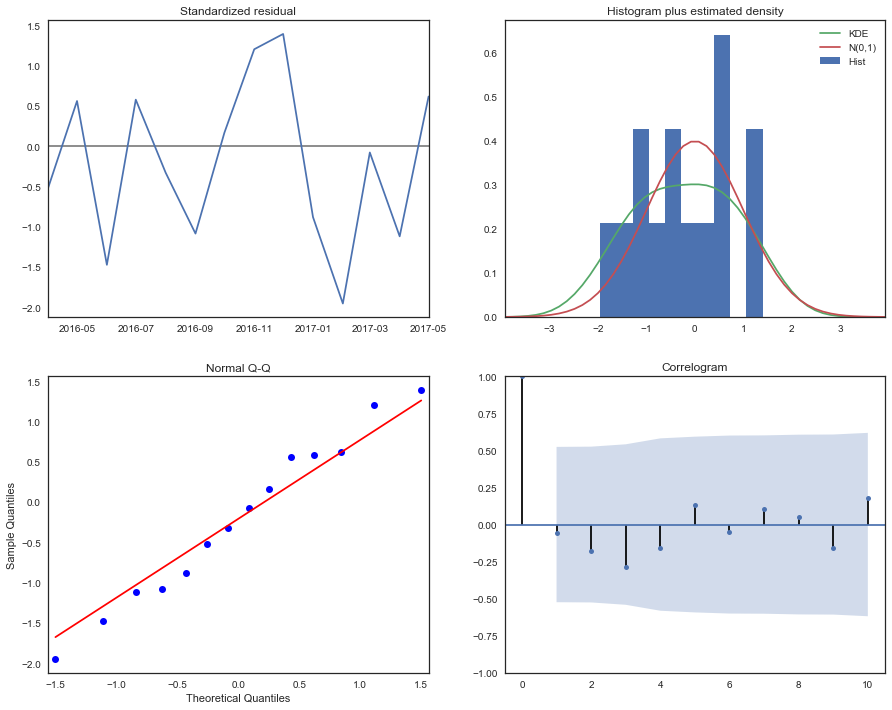

In [56]:
# Diagnostic Plot 
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [57]:
# Arima process: 
# Get predictions 
pred = results.get_prediction(start=pd.to_datetime('2017-02-01'), dynamic=False)
pred_ci = pred.conf_int()

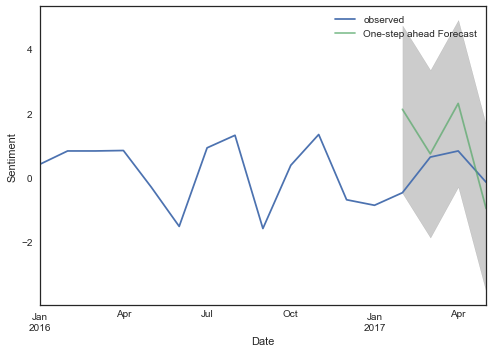

In [58]:
# Plot prediction one step ahed forecast:

ax = yt['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Sentiment')
plt.legend()

plt.show()

In [59]:
# Forecasted predicted mean: 

y_forecasted = pred.predicted_mean
y_truth = yt['2017-03-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.95


In [60]:
# Dynamic prediction code: 
pred_dynamic = results.get_prediction(start=pd.to_datetime('2017-03-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

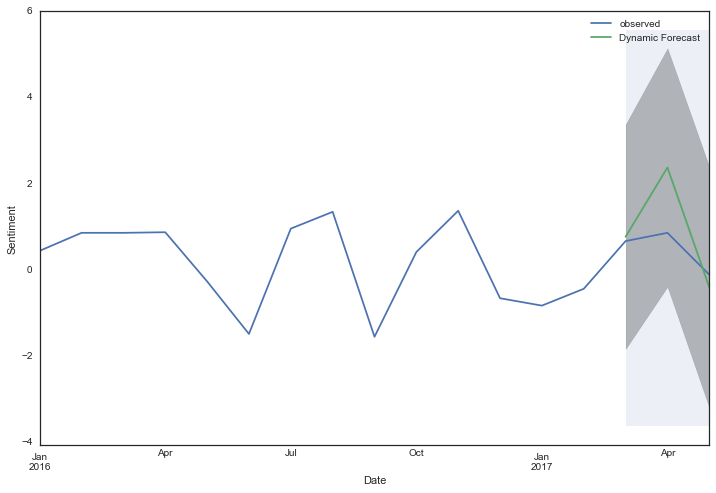

In [61]:
# Dynamic Forecast plot 
ax = yt['2016':].plot(label='observed', figsize=(12, 8))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2017-03-01'), yt.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Sentiment')

plt.legend()
plt.show()

In [62]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = yt['2017-03-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.8


In [63]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=20)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

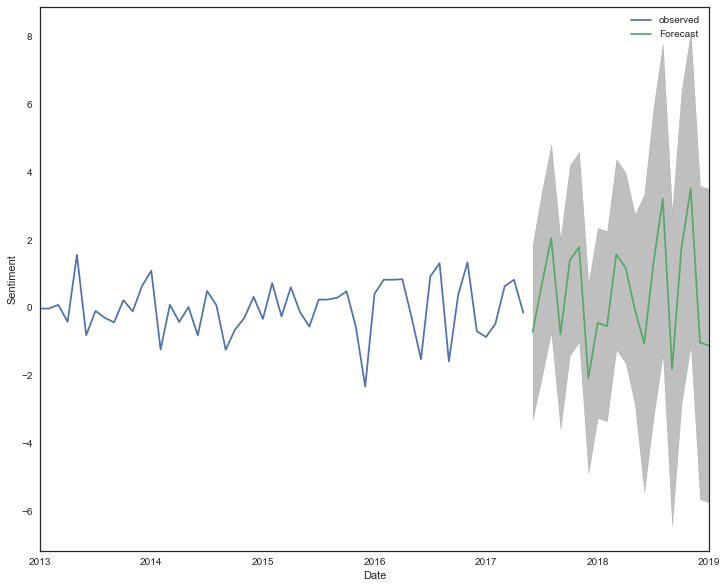

In [64]:
# Plot forecast: 
ax = yt.plot(label='observed', figsize=(12, 10))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sentiment')

plt.legend()
plt.show()

#### Insights: 

1.	There is a clear trend in our model, followed by a mark seasonality. 
2.	It is possible that sentiments in the oil market are not only a cause by individual’s event and classical pessimist behaviour, but also by seasonal monthly trends and other oil patterns. 
3.	There’s a inherent volatility. 

Historical data may not give an accurate picture of an underlying trend.  Relevant events might deform the trend line, creating outliers. Furthermore, a fundamental problem in forecasting trends involves how to identify the turning points. In retrospection, turning points are visible. However, it 's hard to say if the event is a small deviation or the beginning of a new trend. Besides, projections required an extensive set of highly precise data to support them. Nevertheless, it is important to remark that in the case of any mistake in our forecasts, the possibility to make errors is greater, because the passage of time will inexorably introduce new variables.

#### Second Datasets

#### EDA Procedures: 
1. Understand the data set 
2. Rename name column for a better understanding
3. Create a Dictionary for the second DATASET
4. Fix the two different Date format issue 
5. Big issue the column 'Vol':
    1. Eliminate the K, replace '.' , add 000 , add 0000 , replace '0' to make int not float. 
         1. future['Volume']=[future['vol'] if K add 3 zeros]   
         2. future['Vol'] = future['Vol'].str.replace('.','')
         3. future['Vol'] = future['Vol'].str.replace('K','000')
         4. future['Vol'] = future['Vol'].str.replace('M','0000')
         5. future['Vol'] = future['Vol'].replace('0','0')       
    2. Convert 'Vol' type object to 'Float' codes try it: 
         1. future['Vol'].astype(str).astype(int)         
6. Eliminate null values in column 'Vol' 

In [65]:
#Second Data Set:
future = '/Users/EddieArenas/desktop/Capstone/Historical_Oil.csv'
future = pd.read_csv('/Users/EddieArenas/desktop/Capstone/Historical_Oil.csv')

In [66]:
#Check 
future.head()

,Date,Price,Open,High,Low,Volume,Percentage Change
0,"Jun 07, 2017",48.13,48.06,48.15,47.97,-,-0.12%
1,"Jun 06, 2017",48.19,47.40,48.40,46.94,-,1.67%
2,"Jun 05, 2017",47.40,47.71,48.42,46.86,710.20K,-0.55%
3,"Jun 02, 2017",47.66,48.04,48.19,46.74,802.66K,-1.45%
4,"Jun 01, 2017",48.36,48.63,49.17,47.90,774.48K,0.08%


In [67]:
# Rename name column for a better understanding 
future = future.rename(columns={'Percentage Change':'Change'})

In [68]:
future.head()

,Date,Price,Open,High,Low,Volume,Change
0,"Jun 07, 2017",48.13,48.06,48.15,47.97,-,-0.12%
1,"Jun 06, 2017",48.19,47.40,48.40,46.94,-,1.67%
2,"Jun 05, 2017",47.40,47.71,48.42,46.86,710.20K,-0.55%
3,"Jun 02, 2017",47.66,48.04,48.19,46.74,802.66K,-1.45%
4,"Jun 01, 2017",48.36,48.63,49.17,47.90,774.48K,0.08%


In [69]:
# Check
future.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Volume', 'Change'], dtype='object')

In [70]:
##Create a Dictionary for the second DATASET "future"
future_dict = {
    'Price':{
        'type':future.Price.dtype,
        'description':'Final price wti future market'
    },
    'Open':{
        'type':future.Open.dtype,
        'description':'Open price'
    },
    'High':{
        'type':future.High.dtype,
        'description':'Maximum price'
    },
    'Low':{
        'type':future.Low.dtype,
        'description':'Minimun price'
    },
    'Vol':{
        'type':future.Volume.dtype,
        'description':'Volume of WTI future trade intraday'
    },
    'Change':{
        'type':future.Change.dtype,
        'description':'Percentage change in the price intraday'
    },'dataset_shape':future.shape}

future_dict

{'Change': {'description': 'Percentage change in the price intraday',
  'type': dtype('O')},
 'High': {'description': 'Maximum price', 'type': dtype('float64')},
 'Low': {'description': 'Minimun price', 'type': dtype('float64')},
 'Open': {'description': 'Open price', 'type': dtype('float64')},
 'Price': {'description': 'Final price wti future market',
  'type': dtype('float64')},
 'Vol': {'description': 'Volume of WTI future trade intraday',
  'type': dtype('O')},
 'dataset_shape': (8624, 7)}

In [71]:
# Check
future.dtypes
# Issue Date column must be converted in datetime and vol column into float 

Date       object
Price     float64
Open      float64
High      float64
Low       float64
Volume     object
Change     object
dtype: object

In [72]:
future.Date.head()

0    Jun 07, 2017
1    Jun 06, 2017
2    Jun 05, 2017
3    Jun 02, 2017
4    Jun 01, 2017
Name: Date, dtype: object

In [73]:
future['Date'] = future['Date'].str.replace(',','')
future['Date'] = future['Date'].str.replace(' ','/')
future['Date'] = future['Date'].str.replace('Jun','06')
future['Date'] = future['Date'].str.replace('Jan','01')
future['Date'] = future['Date'].str.replace('Feb','02')
future['Date'] = future['Date'].str.replace('Mar','03')
future['Date'] = future['Date'].str.replace('Apr','04')
future['Date'] = future['Date'].str.replace('May','05')
future['Date'] = future['Date'].str.replace('Jul','07')
future['Date'] = future['Date'].str.replace('Aug','08')
future['Date'] = future['Date'].str.replace('Sep','09')
future['Date'] = future['Date'].str.replace('Oct','10')
future['Date'] = future['Date'].str.replace('Nov','11')
future['Date'] = future['Date'].str.replace('Dec','12')

In [74]:
future.Date.head()

0    06/07/2017
1    06/06/2017
2    06/05/2017
3    06/02/2017
4    06/01/2017
Name: Date, dtype: object

In [75]:
# Convert Date column into datetime
future['Date'] =  pd.to_datetime(future['Date'], format='%m/%d/%Y')

In [76]:
#Check 
future.head()

,Date,Price,Open,High,Low,Volume,Change
0,2017-06-07,48.13,48.06,48.15,47.97,-,-0.12%
1,2017-06-06,48.19,47.40,48.40,46.94,-,1.67%
2,2017-06-05,47.40,47.71,48.42,46.86,710.20K,-0.55%
3,2017-06-02,47.66,48.04,48.19,46.74,802.66K,-1.45%
4,2017-06-01,48.36,48.63,49.17,47.90,774.48K,0.08%


In [77]:
future['Volume'] = future['Volume'].str.replace('.','')
future['Volume'] = future['Volume'].str.replace('K','000')
future['Volume'] = future['Volume'].str.replace('M','0000')
future['Volume'] = future['Volume'].replace('-','0')

In [78]:
future['Change'] = future['Change'].str.replace('%','')

In [79]:
future.head()

,Date,Price,Open,High,Low,Volume,Change
0,2017-06-07,48.13,48.06,48.15,47.97,0,-0.12
1,2017-06-06,48.19,47.40,48.40,46.94,0,1.67
2,2017-06-05,47.40,47.71,48.42,46.86,71020000,-0.55
3,2017-06-02,47.66,48.04,48.19,46.74,80266000,-1.45
4,2017-06-01,48.36,48.63,49.17,47.90,77448000,0.08


In [80]:
future['Volume']=future['Volume'].astype(str).astype(int)
future['Change']=future['Change'].astype(str).astype(float)
#pd.to_numeric(future.Vol, errors='ignore')
#pd.to_numeric(future.Vol, errors='raise')

In [81]:
# Check null values
# Check dtypes
print (future.isnull().sum())
print (future.dtypes)
#There's not null values

Date      0
Price     0
Open      0
High      0
Low       0
Volume    0
Change    0
dtype: int64
Date      datetime64[ns]
Price            float64
Open             float64
High             float64
Low              float64
Volume             int64
Change           float64
dtype: object


In [82]:
# Drop rows with 0
future = future[future.Volume != 0]

In [83]:
# Check
future.head(10)
# Problem Solve
# Issue with the index 

,Date,Price,Open,High,Low,Volume,Change
2,2017-06-05,47.40,47.71,48.42,46.86,71020000,-0.55
3,2017-06-02,47.66,48.04,48.19,46.74,80266000,-1.45
4,2017-06-01,48.36,48.63,49.17,47.90,77448000,0.08
5,2017-05-31,48.32,49.65,49.71,47.73,77914000,-2.70
6,2017-05-30,49.66,49.93,50.28,49.03,66349000,-0.62
9,2017-05-26,49.80,48.75,49.94,48.18,76392000,1.84
10,2017-05-25,48.90,51.25,52.00,48.45,1150000,-4.79
11,2017-05-24,51.36,51.44,51.88,51.03,73634000,-0.21
12,2017-05-23,51.47,51.04,51.79,50.57,58414000,1.46
13,2017-05-22,50.73,50.60,51.06,50.44,3001000,0.79


In [84]:
# Reset the index 
future = future.reset_index(drop=True)

In [85]:
#Check
future.head(3)

,Date,Price,Open,High,Low,Volume,Change
0,2017-06-05,47.40,47.71,48.42,46.86,71020000,-0.55
1,2017-06-02,47.66,48.04,48.19,46.74,80266000,-1.45
2,2017-06-01,48.36,48.63,49.17,47.90,77448000,0.08


In [86]:
# Now that we settled Date as my index we migh have missing dates (NaT)
# With the code below we create a New column to preserve the table and eliminate any possible NaT
future["TMP"] = future.index.values                # index is a DateTimeIndex
future = future[future.TMP.notnull()]                  # remove all NaT values
future.drop(["TMP"], axis=1, inplace=True)

In [87]:
# Make Date column my index 
# Check 
future.index = future.Date
future.head(10)

,Date,Price,Open,High,Low,Volume,Change
Date,,,,,,,
2017-06-05,2017-06-05,47.40,47.71,48.42,46.86,71020000,-0.55
2017-06-02,2017-06-02,47.66,48.04,48.19,46.74,80266000,-1.45
2017-06-01,2017-06-01,48.36,48.63,49.17,47.90,77448000,0.08
2017-05-31,2017-05-31,48.32,49.65,49.71,47.73,77914000,-2.70
2017-05-30,2017-05-30,49.66,49.93,50.28,49.03,66349000,-0.62
2017-05-26,2017-05-26,49.80,48.75,49.94,48.18,76392000,1.84
2017-05-25,2017-05-25,48.90,51.25,52.00,48.45,1150000,-4.79
2017-05-24,2017-05-24,51.36,51.44,51.88,51.03,73634000,-0.21
2017-05-23,2017-05-23,51.47,51.04,51.79,50.57,58414000,1.46


In [88]:
# Drop extra Date column and eliminate the space 
future.drop(axis=1,labels='Date',inplace=True)
del future.index.name

In [89]:
# Check 
future.head()

,Price,Open,High,Low,Volume,Change
2017-06-05,47.40,47.71,48.42,46.86,71020000,-0.55
2017-06-02,47.66,48.04,48.19,46.74,80266000,-1.45
2017-06-01,48.36,48.63,49.17,47.90,77448000,0.08
2017-05-31,48.32,49.65,49.71,47.73,77914000,-2.70
2017-05-30,49.66,49.93,50.28,49.03,66349000,-0.62


In [90]:
#Run a correlation for Price (sort it ascending)
mean_corrf_future = future.corr()
mean_corrf_future['Price'].sort_values(ascending=False)

Price     1.000000
Low       0.999735
High      0.999708
Open      0.999396
Volume    0.592503
Change    0.013248
Name: Price, dtype: float64

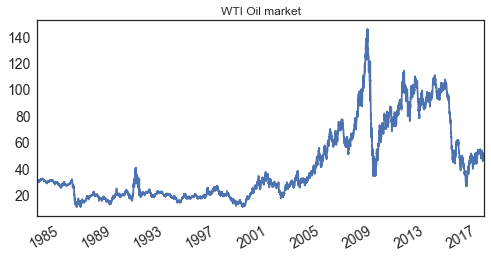

In [91]:
# Plot Oil Price
future.Price.plot(figsize=(8,4), title= 'WTI Oil market', fontsize=14)
plt.show()

##### Individual events and shocks are a constant in our historical wti oil price data, those footrprints might affect our analysis.  

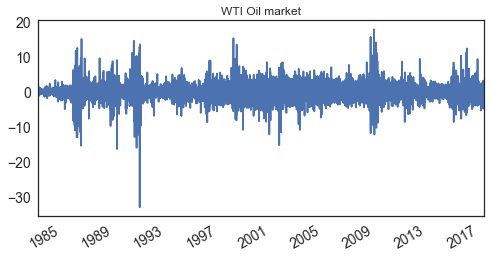

In [92]:
# Plot changes in oil price
future.Change.plot(figsize=(8,4), title= 'WTI Oil market', fontsize=14)
plt.show()
# Observation : We can see high volatility in the oil prices as we expected 

##### Inherent volatility 

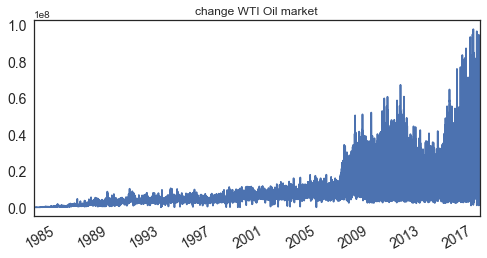

In [93]:
# Plot Volume of trading transactions 
future.Volume.plot(figsize=(8,4), title= 'change WTI Oil market', fontsize=14)
plt.show()
# We can see the peak in 2017, this might be explained by the news buzz first dataset 

##### Trading volume peaked in 2017 

In [94]:
# Resampling my data mean per month and creating a new table. 
future2 = future.truncate(after='1/1/2001')
future_month = future2.resample('MS').mean()
future_month = future_month.fillna(future_month.bfill())

In [95]:
# Check
future_month.head(10)

,Price,Open,High,Low,Volume,Change
2001-01-01,29.259524,29.093333,29.684286,28.623333,6.545714e+06,0.365714
2001-02-01,29.644737,29.709474,30.146316,29.185263,7.049105e+06,-0.213684
2001-03-01,27.271364,27.335000,27.739545,26.930909,6.670364e+06,-0.164091
2001-04-01,27.621000,27.548000,28.025000,27.165500,6.275250e+06,0.418000
2001-05-01,28.684091,28.720000,29.052727,28.278182,5.883591e+06,0.002273
2001-06-01,27.584762,27.693810,28.030476,27.210952,7.146048e+06,-0.349524
2001-07-01,26.467143,26.504762,26.871905,26.055238,6.604476e+06,0.037619
2001-08-01,27.309130,27.215652,27.652609,26.956957,6.423783e+06,0.156087
2001-09-01,25.925625,26.295625,26.650625,25.416875,7.476062e+06,-0.816250
2001-10-01,22.212609,22.331739,22.693478,21.868696,5.923565e+06,-0.420870


In [96]:
future_tsecond = future_month

In [97]:
y2 = future_tsecond.Price

In [98]:
#Run a correlation for Price (sort it ascending)
mean_corrf = future_month.corr()
mean_corrf['Price'].sort_values(ascending=False)

Price     1.000000
Open      0.999936
Low       0.999904
High      0.999854
Volume    0.260494
Change   -0.015813
Name: Price, dtype: float64

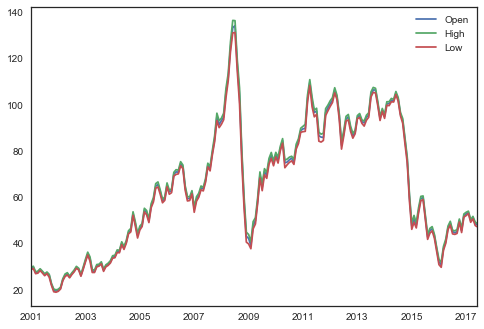

In [99]:
# Plot open, high and low 
future_month[['Open','High','Low']].plot()

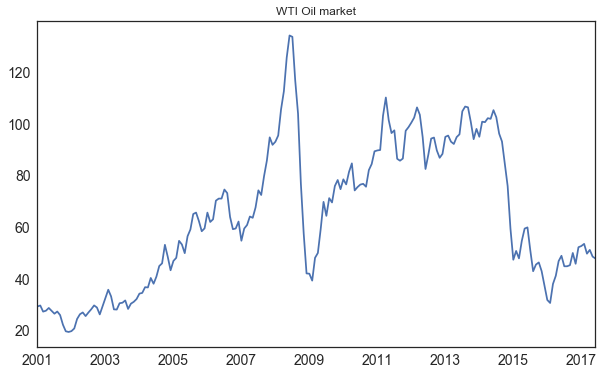

In [100]:
# Plot oil price 
future_month.Price.plot(figsize=(10,6), title= 'WTI Oil market', fontsize=14)
plt.show()

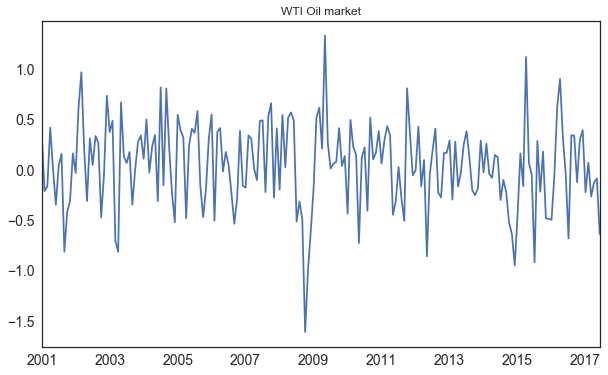

In [101]:
# Plot changes in oil price
future_month.Change.plot(figsize=(10,6), title= 'WTI Oil market', fontsize=14)
plt.show()
# Observation: Volatility implicit 

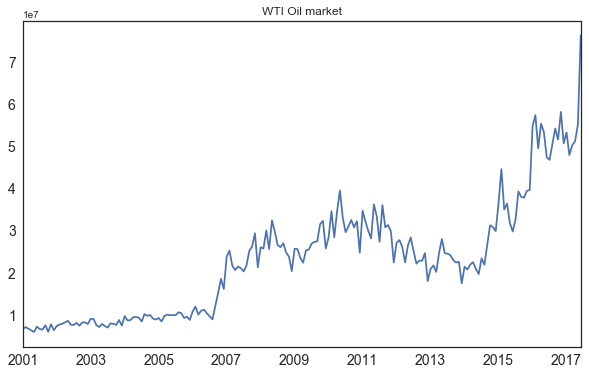

In [102]:
# Plot Volume of oil trading transactions 
future_month.Volume.plot(figsize=(10,6), title= 'WTI Oil market', fontsize=14)
plt.show()

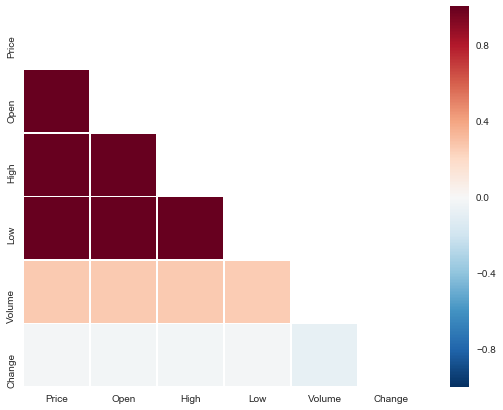

In [103]:
# Plot heatmap correlation: 

# Set the default matplotlib figure size:
fig, ax = plt.subplots(figsize=(9,7))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(mean_corrf, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(mean_corrf, mask=mask, ax=ax,linewidths=.5)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

### Time Serie Analysis second dataset 

In [104]:
future_month.head()

,Price,Open,High,Low,Volume,Change
2001-01-01,29.259524,29.093333,29.684286,28.623333,6.545714e+06,0.365714
2001-02-01,29.644737,29.709474,30.146316,29.185263,7.049105e+06,-0.213684
2001-03-01,27.271364,27.335000,27.739545,26.930909,6.670364e+06,-0.164091
2001-04-01,27.621000,27.548000,28.025000,27.165500,6.275250e+06,0.418000
2001-05-01,28.684091,28.720000,29.052727,28.278182,5.883591e+06,0.002273


In [105]:
# The seccond of the time series in this capstone
# With it i'll try to understand and predict oil prices (next month or years). 

In [106]:
# Creat a new data table with dates and oil prices
y1= future_month['Price']

0.081933235809777336

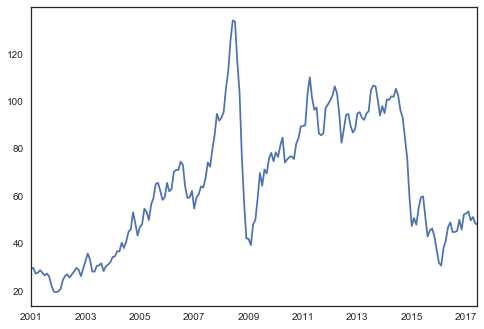

In [107]:
y1.plot()
import sklearn.linear_model
ts = sklearn.linear_model.TheilSenRegressor()
y9 = future_month.reset_index()
y9['seconds'] = y9['index'].dt.strftime("%s").map(int)
y9
ts.fit(y9[['seconds']], y9.Price)
price_drop_per_week = (ts.coef_ * 86400 * 7)[0]
price_drop_per_week

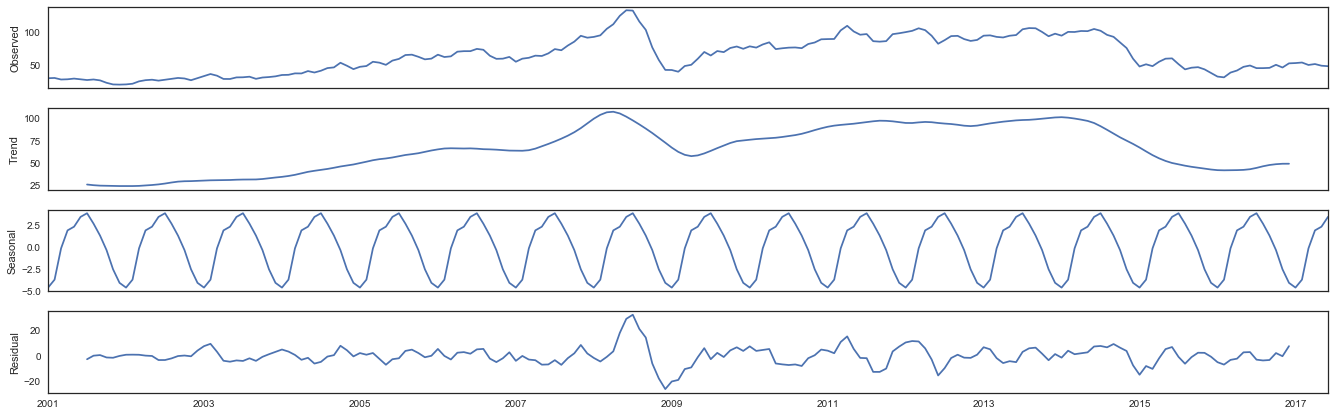

In [108]:
# Descomposition (Explained first dataset)
decomposition = seasonal_decompose(y1, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(20, 6)
plt.show()

#### Search for Stationarity 
    1. Dickey-Fuller test
    
Notes: 
1. Usually null is rejected when the p-value is less than or equal to a specified significance level, often 0.05 (5%), or 0.01 (1%) and even 0.1 (10%).
2. Also if the test statistic is smaller (in absolute value) than the 10% critical value you could reject the null and claim that your variable is stationary. 

In [109]:
# define Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12, center=False).mean()
    rolstd = timeseries.rolling(window=12, center=False).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

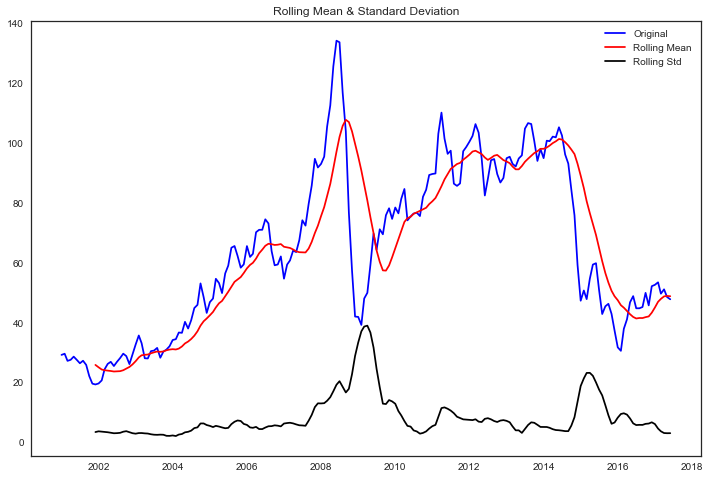

Results of Dickey-Fuller Test:
Test Statistic                  -2.368348
p-value                          0.150870
#Lags Used                       1.000000
Number of Observations Used    196.000000
Critical Value (1%)             -3.464161
Critical Value (5%)             -2.876402
Critical Value (10%)            -2.574692
dtype: float64


In [110]:
# perform test
YBI= y1
test_stationarity(YBI)

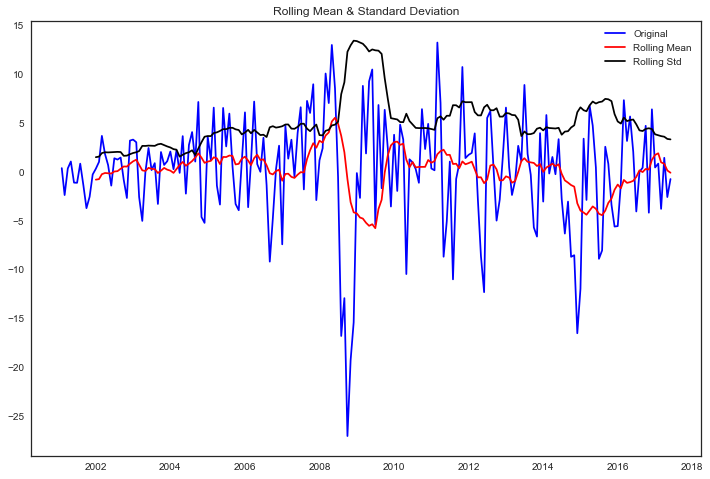

Results of Dickey-Fuller Test:
Test Statistic                -9.121532e+00
p-value                        3.195500e-15
#Lags Used                     0.000000e+00
Number of Observations Used    1.960000e+02
Critical Value (1%)           -3.464161e+00
Critical Value (5%)           -2.876402e+00
Critical Value (10%)          -2.574692e+00
dtype: float64


In [111]:
# first difference
y1['first_difference'] = y1 - y1.shift(1)  
test_stationarity(y1.first_difference.dropna(inplace=False))
YD = y1['first_difference']

In [112]:
# Found Stationarity at 1% 5% and 10% 

In [113]:
YD.head()

2001-01-01         NaN
2001-02-01    0.385213
2001-03-01   -2.373373
2001-04-01    0.349636
2001-05-01    1.063091
Freq: MS, Name: Price, dtype: float64

In [114]:
ye = YD.fillna(YD.bfill())

In [115]:
print (ye.head())
print (ye.tail())

2001-01-01    0.385213
2001-02-01    0.385213
2001-03-01   -2.373373
2001-04-01    0.349636
2001-05-01    1.063091
Freq: MS, Name: Price, dtype: float64
2017-02-01    0.843684
2017-03-01   -3.788192
2017-04-01    1.443455
2017-05-01   -2.577823
2017-06-01   -0.732879
Freq: MS, Name: Price, dtype: float64


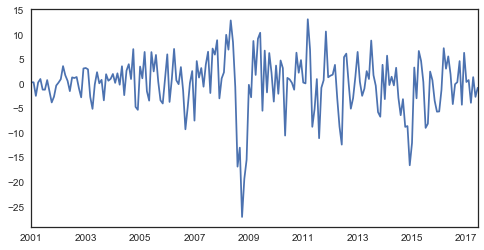

In [116]:
ye.plot(figsize=(8, 4))
plt.show()

In [117]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [118]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
mydf =pd.DataFrame(columns=['col1','col2'])
i=0
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ye,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            mydf.loc[i] = 'ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic), results.aic
            i += 1
        except:
            continue
            
mydf.iloc[mydf.col2.idxmin]  

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1179.3606588755842
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1127.6859753192734
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1184.76804869217
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1181.3601409062135
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1192.9738799977456
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1129.6859645426005
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1213.9783384250886
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1151.6948127321439
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1263.197448928435
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1104.5655968551857
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1162.3511385351603
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1153.604272387041
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1176.2241120562767
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1106.5654274276885
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1205.2566029822565
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1160.3156112010572
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:1211.9188682693616
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1206.0826507685

col1    ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1099.4852...
col2                                              1099.49
Name: 39, dtype: object

In [119]:
# Decide to use: ARIMA(3, 0, 2)x(3, 3, 1, 12)12

mod = sm.tsa.statespace.SARIMAX(ye,
                                order=(3, 1, 2),
                                seasonal_order=(3, 3, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0748      0.875     -0.085      0.932      -1.790       1.641
ar.L2          0.3345      0.449      0.745      0.456      -0.545       1.214
ar.L3          0.0017      0.130      0.013      0.990      -0.254       0.257
ma.L1         -0.4267    966.450     -0.000      1.000   -1894.633    1893.780
ma.L2         -0.5733    554.017     -0.001      0.999   -1086.426    1085.279
ar.S.L12      -0.5754      0.102     -5.630      0.000      -0.776      -0.375
ar.S.L24      -0.3424      0.156     -2.193      0.028      -0.648      -0.036
ar.S.L36      -0.3894      0.103     -3.763      0.000      -0.592      -0.187
ma.S.L12      -1.0000   4969.977     -0.000      1.000   -9741.976    9739.976
sigma2        39.0998   2.01e+05      0.000      1.000   -3.95e+05    3.95e+05


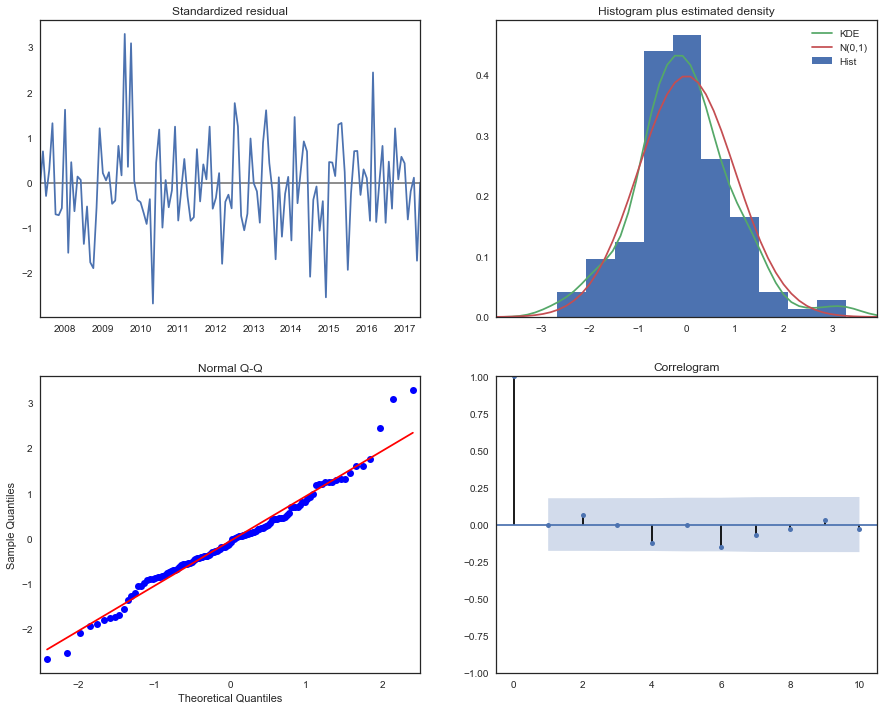

In [120]:
# Diagnostic Plot 
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [121]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

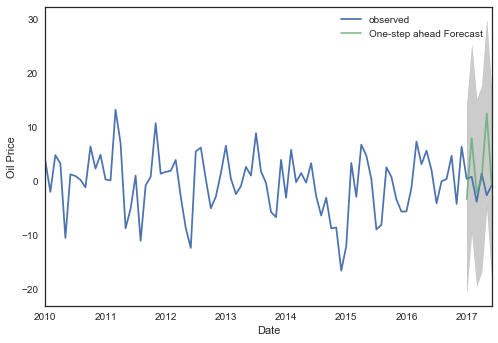

In [122]:
# Plot One-step ahead Forecast: 
ax = ye['2010-01-01':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Oil Price')
plt.legend()

plt.show()

In [123]:
y_forecasted = pred.predicted_mean
y_truth = ye['2017-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 49.71


In [124]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

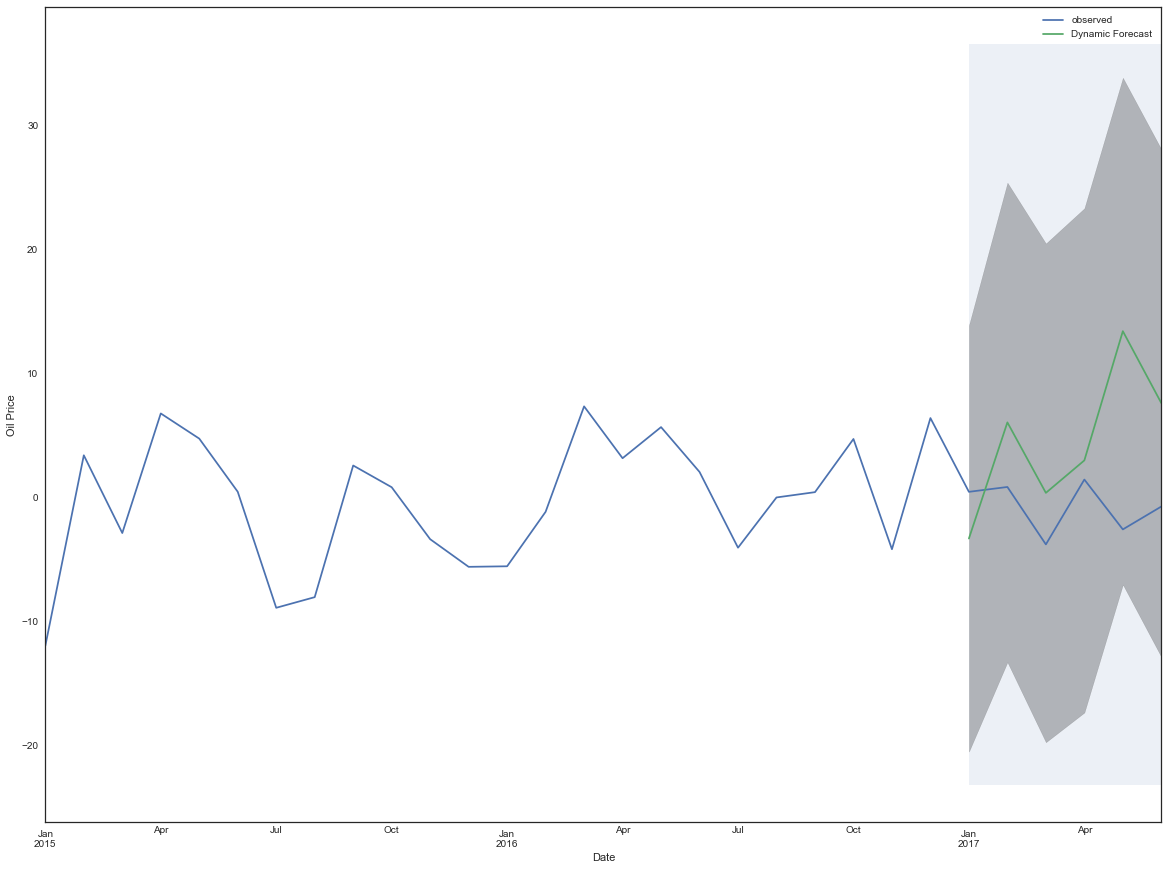

In [125]:
# Plot Dynamic forecast: 
ax = ye['2015-01-01':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2017'), ye.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Oil Price')

plt.legend()
plt.show()

In [126]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = ye['2017-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 64.36


In [127]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=50)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

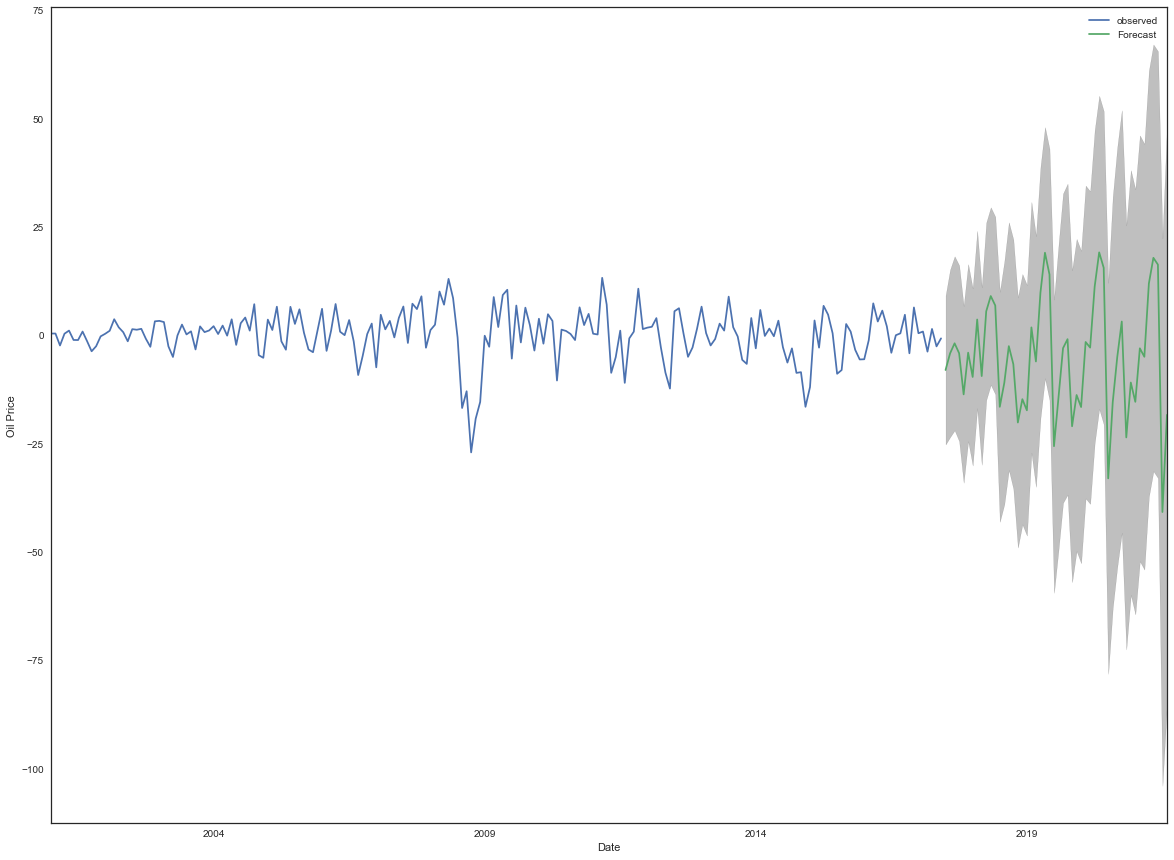

In [128]:
# Plot Forecast: 
ax = ye.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Oil Price')

plt.legend()
plt.show()

#### First difference test create a missrepressention in oil prices. However, it's possible to find some insights : 

1.  Shocks affect our model. However, here is possible to look patterns, trends and seasonality.  
2.	There’s a inherent volatility.
3.  Lost of accuracy in our dynamic forecast
4.  Possible trend showing highest oil prices in the future. 

Historical data may not give an accurate picture of an underlying trend. Relevant events might deform the trend line, creating outliers. Furthermore, a fundamental problem in forecasting trends involves how to identify the turning points. In retrospection, turning points are visible. However, it 's hard to say if the event is a small deviation or the beginning of a new trend. Besides, projections required an extensive set of highly precise data to support them. Nevertheless, it is important to remark that in the case of any mistake in our forecasts, the possibility to make errors is greater, because the passage of time will inexorably introduce new variables.

#### HERE I'll try to study the relation between price and sentiment in 2017

In [129]:
future_point = future['2017'] 

In [130]:
future_point.head()

,Price,Open,High,Low,Volume,Change
2017-06-05,47.40,47.71,48.42,46.86,71020000,-0.55
2017-06-02,47.66,48.04,48.19,46.74,80266000,-1.45
2017-06-01,48.36,48.63,49.17,47.90,77448000,0.08
2017-05-31,48.32,49.65,49.71,47.73,77914000,-2.70
2017-05-30,49.66,49.93,50.28,49.03,66349000,-0.62


In [131]:
sent_point = sent['2017']

In [132]:
sent_point.head()

,Sentiment,Sentiment_High,Sentiment_Low,News_Volume,News_Buzz
2017-05-31,-4.0,-1.0,-5.0,18.0,1.0
2017-05-30,-1.0,4.0,-5.0,25.0,2.0
2017-05-29,-4.0,-2.0,-5.0,24.0,2.0
2017-05-28,-2.0,2.0,-5.0,4.0,3.0
2017-05-27,-5.0,-4.0,-5.0,8.0,6.0


In [133]:
## Merged code, two datasets: 
point = pd.merge(future_point,sent_point, how='inner', left_index=True, right_index=True)

In [134]:
point.head(29)

,Price,Open,High,Low,Volume,Change,Sentiment,Sentiment_High,Sentiment_Low,News_Volume,News_Buzz
2017-05-31,48.32,49.65,49.71,47.73,77914000,-2.70,-4.000000,-1.0,-5.0,18.0,1.000000
2017-05-30,49.66,49.93,50.28,49.03,66349000,-0.62,-1.000000,4.0,-5.0,25.0,2.000000
2017-05-26,49.80,48.75,49.94,48.18,76392000,1.84,-3.000000,2.0,-5.0,27.0,7.000000
2017-05-25,48.90,51.25,52.00,48.45,1150000,-4.79,-4.000000,-1.0,-5.0,103.0,10.000000
2017-05-24,51.36,51.44,51.88,51.03,73634000,-0.21,-4.000000,-1.0,-5.0,71.0,9.000000
2017-05-23,51.47,51.04,51.79,50.57,58414000,1.46,-2.000000,2.0,-5.0,38.0,5.000000
2017-05-22,50.73,50.60,51.06,50.44,3001000,0.79,-1.000000,4.0,-5.0,37.0,5.000000
2017-05-19,50.33,49.28,50.53,49.28,14645000,1.99,-1.000000,4.0,-5.0,34.0,6.000000
2017-05-16,48.66,48.82,49.38,48.17,58921000,-0.39,-1.000000,4.0,-5.0,54.0,8.000000
2017-05-15,48.85,47.85,49.66,47.75,68715000,2.11,-1.000000,4.0,-5.0,74.0,10.000000


In [135]:
point.columns

Index(['Price', 'Open', 'High', 'Low', 'Volume', 'Change', 'Sentiment',
       'Sentiment_High', 'Sentiment_Low', 'News_Volume', 'News_Buzz'],
      dtype='object')

In [136]:
import statsmodels.formula.api as smf

In [137]:
### First regression model, focus it on Price
tp = 'Price ~ Sentiment + Volume + Sentiment_High + Sentiment_Low + News_Volume + News_Buzz'
modelp = smf.ols(tp, data=point)
resultsp = modelp.fit()

In [138]:
# Check
resultsp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     4.889
Date:                Wed, 07 Jun 2017   Prob (F-statistic):           0.000220
Time:                        20:22:06   Log-Likelihood:                -213.56
No. Observations:                 100   AIC:                             441.1
Df Residuals:                      93   BIC:                             459.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         51.9020      0.939     55.288      0.000      50.038      53.766
Sentiment          0.2015      0.442      0.456      0.650      -0.676       1.079
Volume         -9.016e-09   1.03e-08     -0.872      0.385   -2.95e-08    1.15e-08
Sentiment_High    -0.1953      0.228     -0.857      0.393      -0.648       0.257
Sentiment_Low     -0.0996      0.332     -0.300      0.765      -0.759       0.560
News_Volume       -0.0484      0.013     -3.827      0.000      -0.073      -0.023
News_Buzz          0.0166      0.010      1.667      0.099      -0.003       0.036
==============================================================================
Omnibus:                       11.432   Durbin-Watson:                   0.311
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                8.697
Skew:                          -0.608   Prob(JB):                       0.0129
Kurtosis:                       2.221   Cond. No.                     2.57e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.57e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [139]:
#### Fascinating p-value for sentiment 

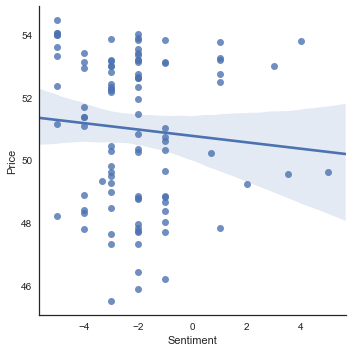

In [140]:
# Plot the linear regression only between Sentiment and Price 
% matplotlib inline

sns.lmplot(x='Sentiment', y='Price', data=point)
plt.show()

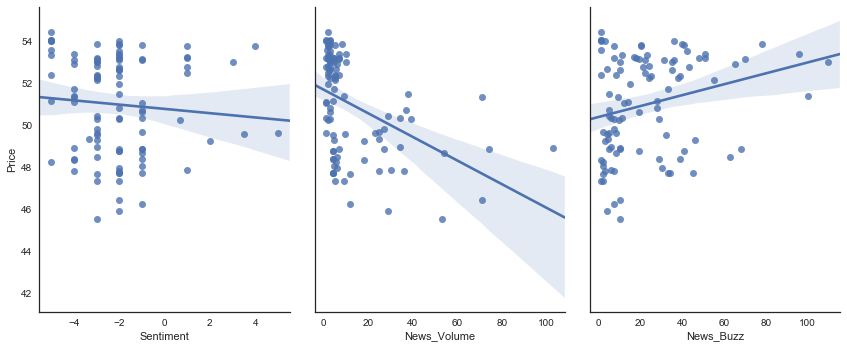

In [141]:
#Combine set of linear regressions
sns.pairplot(point, x_vars=["Sentiment","News_Volume","News_Buzz"], y_vars=["Price"],
             size=5, aspect=.8, kind="reg");

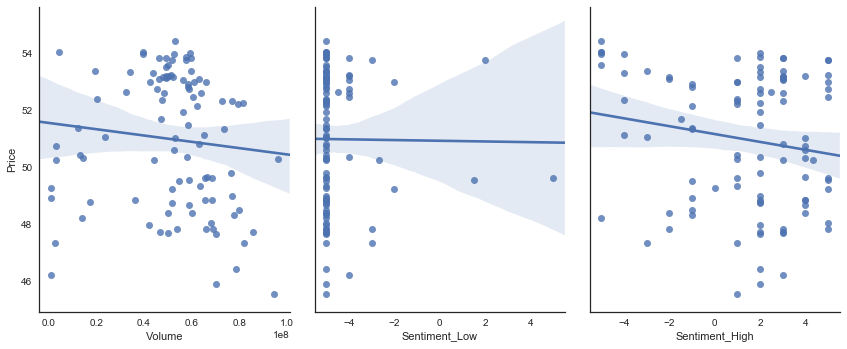

In [142]:
#Combine set of linear regressions
sns.pairplot(point, x_vars=["Volume","Sentiment_Low","Sentiment_High"], y_vars=["Price"],
             size=5, aspect=.8, kind="reg");

In [143]:
### Second regression model, focus on Change price
tp = 'Change ~ Sentiment + Volume + Sentiment_High + Sentiment_Low + News_Volume + News_Buzz'
modelp = smf.ols(tp, data=point)
resultsp = modelp.fit()

In [144]:
resultsp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Change   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.175
Date:                Wed, 07 Jun 2017   Prob (F-statistic):              0.327
Time:                        20:22:09   Log-Likelihood:                -187.47
No. Observations:                 100   AIC:                             388.9
Df Residuals:                      93   BIC:                             407.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.2468      0.723     -0.341      0.734      -1.683       1.189
Sentiment          0.2591      0.341      0.761      0.449      -0.417       0.935
Volume           1.44e-09   7.96e-09      0.181      0.857   -1.44e-08    1.72e-08
Sentiment_High    -0.0170      0.176     -0.097      0.923      -0.366       0.332
Sentiment_Low     -0.1458      0.256     -0.569      0.570      -0.654       0.363
News_Volume       -0.0128      0.010     -1.314      0.192      -0.032       0.007
News_Buzz          0.0041      0.008      0.532      0.596      -0.011       0.019
==============================================================================
Omnibus:                        7.657   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                7.189
Skew:                          -0.596   Prob(JB):                       0.0275
Kurtosis:                       3.554   Cond. No.                     2.57e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.57e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### p-value Price~Sentiment relative good, but impressive for sentiment_high 

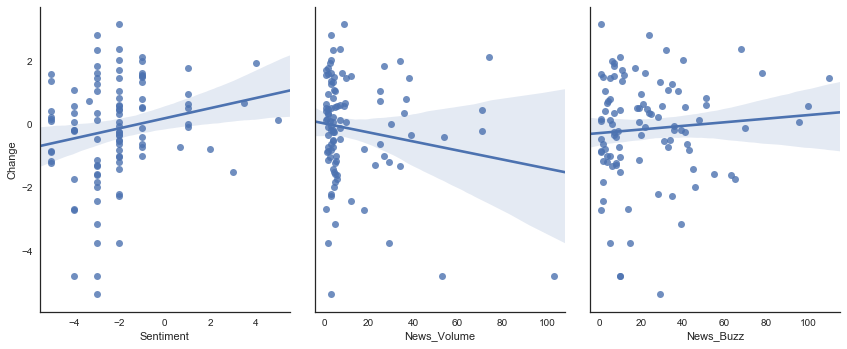

In [145]:
#Combine set of linear regressions
sns.pairplot(point, x_vars=["Sentiment","News_Volume","News_Buzz"], y_vars=["Change"],
             size=5, aspect=.8, kind="reg");

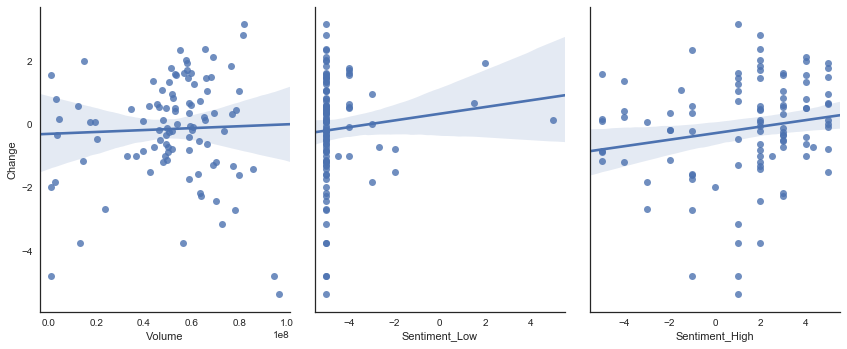

In [146]:
#Combine set of linear regressions
sns.pairplot(point, x_vars=["Volume","Sentiment_Low","Sentiment_High"], y_vars=["Change"],
             size=5, aspect=.8, kind="reg");

#### HERE I'll try to study the relation between price and sentiment from march to april 2017

In [147]:
future_point2 = future.truncate(after='1/1/2017')

In [148]:
future_point2.head()

,Price,Open,High,Low,Volume,Change
2017-06-05,47.40,47.71,48.42,46.86,71020000,-0.55
2017-06-02,47.66,48.04,48.19,46.74,80266000,-1.45
2017-06-01,48.36,48.63,49.17,47.90,77448000,0.08
2017-05-31,48.32,49.65,49.71,47.73,77914000,-2.70
2017-05-30,49.66,49.93,50.28,49.03,66349000,-0.62


In [149]:
sent_point2 = sent.truncate(after='1/1/2017')

In [150]:
sent_point2.head()

,Sentiment,Sentiment_High,Sentiment_Low,News_Volume,News_Buzz
2017-05-31,-4.0,-1.0,-5.0,18.0,1.0
2017-05-30,-1.0,4.0,-5.0,25.0,2.0
2017-05-29,-4.0,-2.0,-5.0,24.0,2.0
2017-05-28,-2.0,2.0,-5.0,4.0,3.0
2017-05-27,-5.0,-4.0,-5.0,8.0,6.0


In [151]:
## Merged code, two datasets: 
point2 = pd.merge(future_point2,sent_point2, how='inner', left_index=True, right_index=True)

In [152]:
point2.head(30)

,Price,Open,High,Low,Volume,Change,Sentiment,Sentiment_High,Sentiment_Low,News_Volume,News_Buzz
2017-05-31,48.32,49.65,49.71,47.73,77914000,-2.70,-4.000000,-1.0,-5.0,18.0,1.000000
2017-05-30,49.66,49.93,50.28,49.03,66349000,-0.62,-1.000000,4.0,-5.0,25.0,2.000000
2017-05-26,49.80,48.75,49.94,48.18,76392000,1.84,-3.000000,2.0,-5.0,27.0,7.000000
2017-05-25,48.90,51.25,52.00,48.45,1150000,-4.79,-4.000000,-1.0,-5.0,103.0,10.000000
2017-05-24,51.36,51.44,51.88,51.03,73634000,-0.21,-4.000000,-1.0,-5.0,71.0,9.000000
2017-05-23,51.47,51.04,51.79,50.57,58414000,1.46,-2.000000,2.0,-5.0,38.0,5.000000
2017-05-22,50.73,50.60,51.06,50.44,3001000,0.79,-1.000000,4.0,-5.0,37.0,5.000000
2017-05-19,50.33,49.28,50.53,49.28,14645000,1.99,-1.000000,4.0,-5.0,34.0,6.000000
2017-05-16,48.66,48.82,49.38,48.17,58921000,-0.39,-1.000000,4.0,-5.0,54.0,8.000000
2017-05-15,48.85,47.85,49.66,47.75,68715000,2.11,-1.000000,4.0,-5.0,74.0,10.000000


In [153]:
### First regression model, focus it on Price
tp2 = 'Price ~ Sentiment + Volume + Sentiment_High + Sentiment_Low + News_Volume + News_Buzz'
modelp2 = smf.ols(tp2, data=point2)
resultsp2 = modelp2.fit()

In [154]:
resultsp2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     4.889
Date:                Wed, 07 Jun 2017   Prob (F-statistic):           0.000220
Time:                        20:22:14   Log-Likelihood:                -213.56
No. Observations:                 100   AIC:                             441.1
Df Residuals:                      93   BIC:                             459.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         51.9020      0.939     55.288      0.000      50.038      53.766
Sentiment          0.2015      0.442      0.456      0.650      -0.676       1.079
Volume         -9.016e-09   1.03e-08     -0.872      0.385   -2.95e-08    1.15e-08
Sentiment_High    -0.1953      0.228     -0.857      0.393      -0.648       0.257
Sentiment_Low     -0.0996      0.332     -0.300      0.765      -0.759       0.560
News_Volume       -0.0484      0.013     -3.827      0.000      -0.073      -0.023
News_Buzz          0.0166      0.010      1.667      0.099      -0.003       0.036
==============================================================================
Omnibus:                       11.432   Durbin-Watson:                   0.311
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                8.697
Skew:                          -0.608   Prob(JB):                       0.0129
Kurtosis:                       2.221   Cond. No.                     2.57e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.57e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

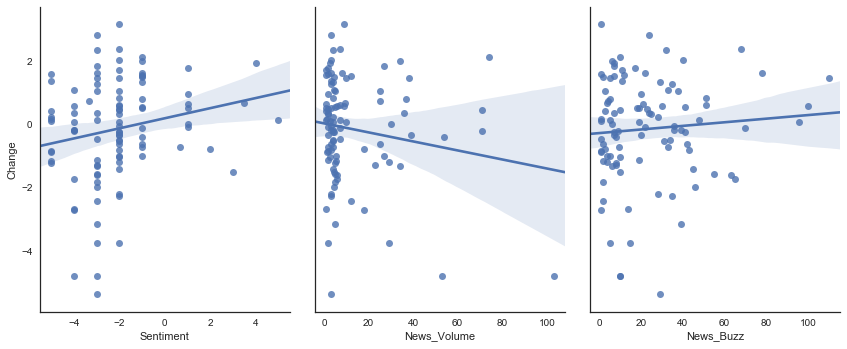

In [155]:
#Combine set of linear regressions
sns.pairplot(point2, x_vars=["Sentiment","News_Volume","News_Buzz"], y_vars=["Change"],
             size=5, aspect=.8, kind="reg");

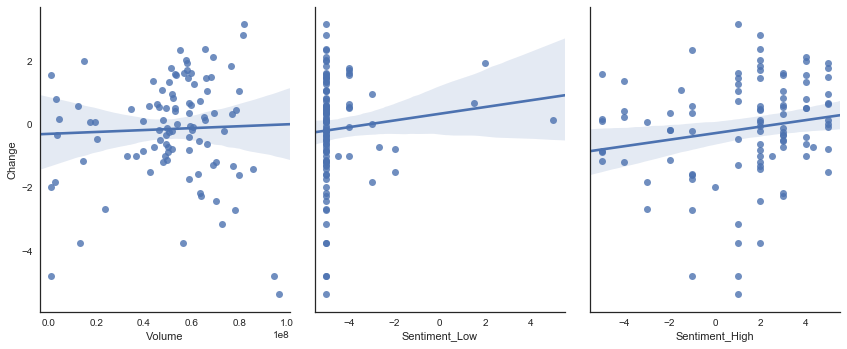

In [156]:
#Combine set of linear regressions
sns.pairplot(point2, x_vars=["Volume","Sentiment_Low","Sentiment_High"], y_vars=["Change"],
             size=5, aspect=.8, kind="reg");

##### Very interesting!!! further evaluation soon 

##### Second regression model, focus on Change price

In [157]:
### Second regression model, focus on Change price
tp3 = 'Change ~ Sentiment + Volume + Sentiment_High + Sentiment_Low + News_Volume + News_Buzz'
modelp3 = smf.ols(tp, data=point2)
resultsp3 = modelp3.fit()

In [158]:
resultsp3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Change   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.175
Date:                Wed, 07 Jun 2017   Prob (F-statistic):              0.327
Time:                        20:22:16   Log-Likelihood:                -187.47
No. Observations:                 100   AIC:                             388.9
Df Residuals:                      93   BIC:                             407.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.2468      0.723     -0.341      0.734      -1.683       1.189
Sentiment          0.2591      0.341      0.761      0.449      -0.417       0.935
Volume           1.44e-09   7.96e-09      0.181      0.857   -1.44e-08    1.72e-08
Sentiment_High    -0.0170      0.176     -0.097      0.923      -0.366       0.332
Sentiment_Low     -0.1458      0.256     -0.569      0.570      -0.654       0.363
News_Volume       -0.0128      0.010     -1.314      0.192      -0.032       0.007
News_Buzz          0.0041      0.008      0.532      0.596      -0.011       0.019
==============================================================================
Omnibus:                        7.657   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                7.189
Skew:                          -0.596   Prob(JB):                       0.0275
Kurtosis:                       3.554   Cond. No.                     2.57e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.57e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Very impressive sentiment_High!! 

#### Merged Sentiment per month dataset and Future Price per month dataset

In [159]:
## Merged code, two datasets: 
result= pd.merge(future_month,sent_month, how='inner', left_index=True, right_index=True)

In [160]:
# Check
result.tail()

,Price,Open,High,Low,Volume,Change,Sentiment,Sentiment_High,Sentiment_Low,News_Volume,News_Buzz
2017-01-01,52.618421,52.824737,53.505263,52.078421,5.323642e+07,-0.226316,-2.338710,0.887097,-4.548387,2.983871,22.774194
2017-02-01,53.462105,53.386842,53.984737,52.936316,4.786289e+07,0.068421,-2.803571,-0.928571,-4.321429,4.285714,25.250000
2017-03-01,49.673913,49.898696,50.375217,49.172609,5.016117e+07,-0.267391,-2.161290,1.177419,-4.677419,4.306452,27.854839
2017-04-01,51.117368,51.182632,51.715789,50.604211,5.113963e+07,-0.126316,-1.327586,2.206897,-3.620690,10.051724,13.137931
2017-05-01,48.539545,48.598636,49.291818,47.770909,5.501150e+07,-0.088182,-1.465517,1.965517,-3.879310,29.568966,5.310345


In [161]:
# Codes below are useful if "date" column is not located as the index
# result['Date'] = result.index
# result.head()

In [162]:
#To CSV for a future reference.
result.to_csv('result_final2_capstone.csv')

#### Linear Regression merged dataset 

In [163]:
# Let's look at the price of oil specifically as our target.
# I want to see if these variables are related to the oil price movement by month
# I'll use statsmodels so I can get the summary.

In [164]:
# Check which columns we have 
result.columns

Index(['Price', 'Open', 'High', 'Low', 'Volume', 'Change', 'Sentiment',
       'Sentiment_High', 'Sentiment_Low', 'News_Volume', 'News_Buzz'],
      dtype='object')

In [165]:
import statsmodels.formula.api as smf

In [166]:
t = 'Price ~ Sentiment + Volume + Sentiment_High + Sentiment_Low + News_Volume + News_Buzz'
modelt = smf.ols(t, data=result)
resultst = modelt.fit()

In [167]:
# Check
resultst.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     71.85
Date:                Wed, 07 Jun 2017   Prob (F-statistic):           1.07e-21
Time:                        20:22:22   Log-Likelihood:                -185.09
No. Observations:                  53   AIC:                             384.2
Df Residuals:                      46   BIC:                             398.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        149.2532     10.498     14.218      0.000     128.123     170.384
Sentiment         15.7389      5.840      2.695      0.010       3.984      27.494
Volume         -1.294e-06   1.39e-07     -9.292      0.000   -1.57e-06   -1.01e-06
Sentiment_High    -9.4710      3.290     -2.879      0.006     -16.093      -2.849
Sentiment_Low     -4.7324      4.787     -0.989      0.328     -14.369       4.904
News_Volume       -0.4610      0.152     -3.037      0.004      -0.766      -0.155
News_Buzz         -0.4161      0.339     -1.226      0.226      -1.099       0.267
==============================================================================
Omnibus:                        3.673   Durbin-Watson:                   0.970
Prob(Omnibus):                  0.159   Jarque-Bera (JB):                1.785
Skew:                           0.065   Prob(JB):                        0.410
Kurtosis:                       2.110   Cond. No.                     3.70e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.7e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

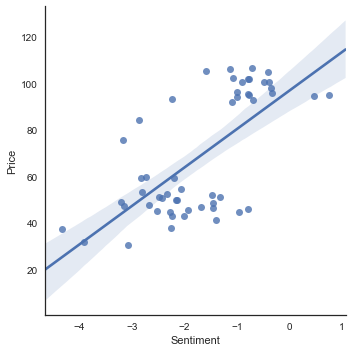

In [168]:
# Plot the linear regression only between Sentiment and Price 
% matplotlib inline

sns.lmplot(x='Sentiment', y='Price', data=result)
plt.show()

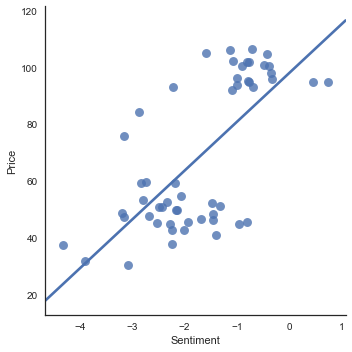

In [169]:
# Trying to use "robust" to solve outliers problems 
sns.lmplot(x='Sentiment', y='Price', data=result,
           robust=True, ci=None, scatter_kws={"s": 80});
# Problem Persist 

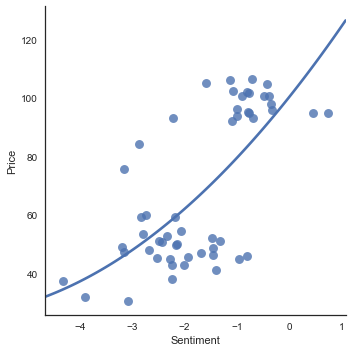

In [170]:
# Trying to use a polynomical regression (degree 2)
sns.lmplot(x='Sentiment', y='Price', data=result,
           order= 2, ci=None, scatter_kws={"s": 80});
# It looks way better 
# Still big pressence of ouliers 

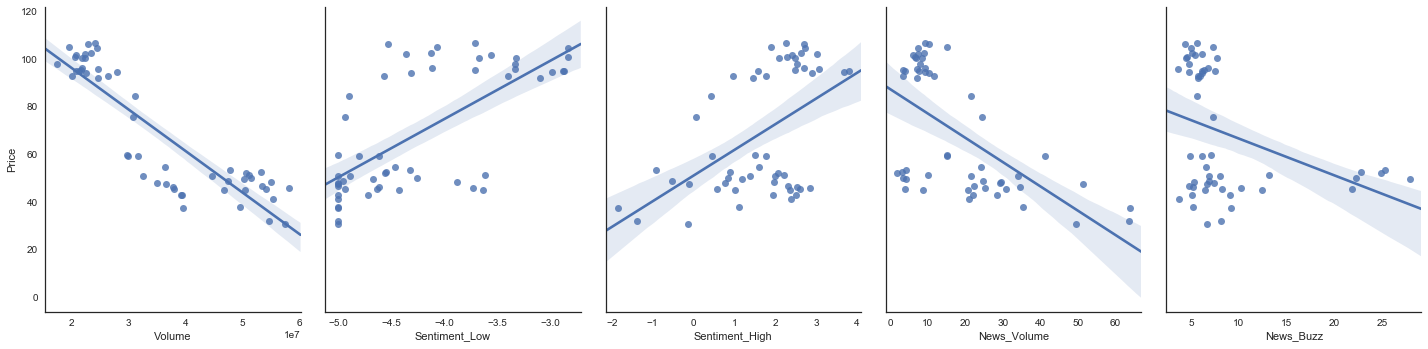

In [171]:
#Combine set of linear regressions
sns.pairplot(result, x_vars=["Volume","Sentiment_Low","Sentiment_High","News_Volume","News_Buzz"], y_vars=["Price"],
             size=5, aspect=.8, kind="reg");

In [172]:
# I'm going to extract the residuals out of this model to look for normality:
residsf = resultst.resid

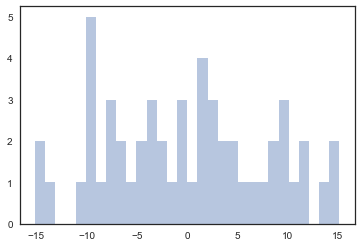

In [173]:
# Plot the residuals: 
sns.distplot(residsf, kde=False, bins=30) #scaterplot better
# Problems with normality of my residuals 

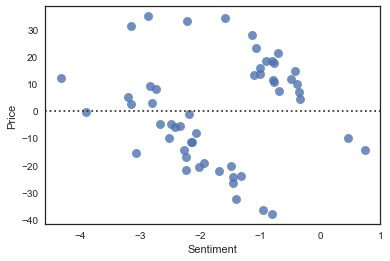

In [174]:
# Plot residuals looking for structure
sns.residplot(x="Sentiment", y="Price", data=result,
              scatter_kws={"s": 80});
# There is a structure in my residuals, possibility that linear regression wont fit this model

#### Create Dummy Variables for logistic regression

In [175]:
# Create a new definition (Table)
result_log = result[['Price', 'Open', 'High', 'Low', 'Volume', 'Change','Sentiment','News_Volume',
       'News_Buzz','Sentiment_High', 'Sentiment_Low' ]]

In [176]:
# Check
result_log.head()

,Price,Open,High,Low,Volume,Change,Sentiment,News_Volume,News_Buzz,Sentiment_High,Sentiment_Low
2013-01-01,94.828571,94.583333,95.345714,93.973810,2.083390e+07,0.288571,-0.769231,4.038462,7.442308,1.576923,-2.884615
2013-02-01,95.321579,95.611053,96.240526,94.547368,2.168042e+07,-0.298421,-0.785714,3.250000,6.321429,2.482143,-3.714286
2013-03-01,92.957000,92.681500,93.499000,91.983000,2.013805e+07,0.277000,-0.693548,3.370968,5.912903,1.774194,-3.403226
2013-04-01,92.067727,92.199091,92.970909,90.800000,2.467755e+07,-0.168182,-1.100000,7.133333,5.706667,1.466667,-3.100000
2013-05-01,94.734762,94.662857,95.515238,93.346667,2.793929e+07,-0.024286,0.467742,9.241935,4.774194,3.693548,-2.983871


In [177]:
# Create a new column
result_log['Sentiment_Dummy'] = result_log['Sentiment']

In [178]:
result_log.columns

Index(['Price', 'Open', 'High', 'Low', 'Volume', 'Change', 'Sentiment',
       'News_Volume', 'News_Buzz', 'Sentiment_High', 'Sentiment_Low',
       'Sentiment_Dummy'],
      dtype='object')

In [179]:
# 1 If market is going up
# 0 If market is going down
#Create the condition:
result_log["Sentiment_Dummy"] = [1 if x  > -0.9 else 0 for x in result_log["Sentiment"]]

#### The reason to take -0.9 as bullish sentiment is because I'm trying to overcome over-pesimist market assumptions

In [180]:
# 1 If oil price is going up
# 0 If oil price is going down
#Create the condition:
result_log['Change_log'] = [1 if x  > 0 else 0 for x in result_log["Change"]]

In [181]:
result_log.head()

,Price,Open,High,Low,Volume,Change,Sentiment,News_Volume,News_Buzz,Sentiment_High,Sentiment_Low,Sentiment_Dummy,Change_log
2013-01-01,94.828571,94.583333,95.345714,93.973810,2.083390e+07,0.288571,-0.769231,4.038462,7.442308,1.576923,-2.884615,1,1
2013-02-01,95.321579,95.611053,96.240526,94.547368,2.168042e+07,-0.298421,-0.785714,3.250000,6.321429,2.482143,-3.714286,1,0
2013-03-01,92.957000,92.681500,93.499000,91.983000,2.013805e+07,0.277000,-0.693548,3.370968,5.912903,1.774194,-3.403226,1,1
2013-04-01,92.067727,92.199091,92.970909,90.800000,2.467755e+07,-0.168182,-1.100000,7.133333,5.706667,1.466667,-3.100000,0,0
2013-05-01,94.734762,94.662857,95.515238,93.346667,2.793929e+07,-0.024286,0.467742,9.241935,4.774194,3.693548,-2.983871,1,0


In [182]:
#Build a dictionary for the new column dummies
dummy_dict = {
    'Bullish':{
        'Value':'1',
        'description':'Investors who believe that the market price will increase over time'
    },
    'Bearish':{
        'Value':"0",
        'description':'Investors who believe that the market price will decline over time'
    },'dataset_shape':result_log.Sentiment_Dummy.shape}
    

In [183]:
#Print Dictionary
print (dummy_dict)

{'Bullish': {'Value': '1', 'description': 'Investors who believe that the market price will increase over time'}, 'Bearish': {'Value': '0', 'description': 'Investors who believe that the market price will decline over time'}, 'dataset_shape': (53,)}


In [184]:
#Create a new dataframe to work (Select the columns, I'll use)
df = result_log[['Price', 'Open','Sentiment','High', 'Low', 'Volume','Change','News_Volume',
       'News_Buzz', 'Change_log','Sentiment_Dummy', 'Sentiment_High', 'Sentiment_Low']]

In [185]:
# Check:
df.head()

,Price,Open,Sentiment,High,Low,Volume,Change,News_Volume,News_Buzz,Change_log,Sentiment_Dummy,Sentiment_High,Sentiment_Low
2013-01-01,94.828571,94.583333,-0.769231,95.345714,93.973810,2.083390e+07,0.288571,4.038462,7.442308,1,1,1.576923,-2.884615
2013-02-01,95.321579,95.611053,-0.785714,96.240526,94.547368,2.168042e+07,-0.298421,3.250000,6.321429,0,1,2.482143,-3.714286
2013-03-01,92.957000,92.681500,-0.693548,93.499000,91.983000,2.013805e+07,0.277000,3.370968,5.912903,1,1,1.774194,-3.403226
2013-04-01,92.067727,92.199091,-1.100000,92.970909,90.800000,2.467755e+07,-0.168182,7.133333,5.706667,0,0,1.466667,-3.100000
2013-05-01,94.734762,94.662857,0.467742,95.515238,93.346667,2.793929e+07,-0.024286,9.241935,4.774194,0,1,3.693548,-2.983871


In [186]:
# Identify the potential correlation between other variables with Sentiment
corr_sent = df.corr()
print (corr_sent['Sentiment_Dummy'].sort_values(ascending=False)) #Low values

Sentiment_Dummy    1.000000
Sentiment_Low      0.754003
Sentiment          0.710831
Price              0.607809
Low                0.607488
High               0.606096
Open               0.605160
Sentiment_High     0.486566
Change_log         0.276948
Change             0.248547
News_Buzz         -0.253976
News_Volume       -0.400537
Volume            -0.507086
Name: Sentiment_Dummy, dtype: float64


In [187]:
# Did not improve my correlation Sentiment_Dummy ~ Price 
# Problem here

0    39
1    14
Name: Sentiment_Dummy, dtype: int64


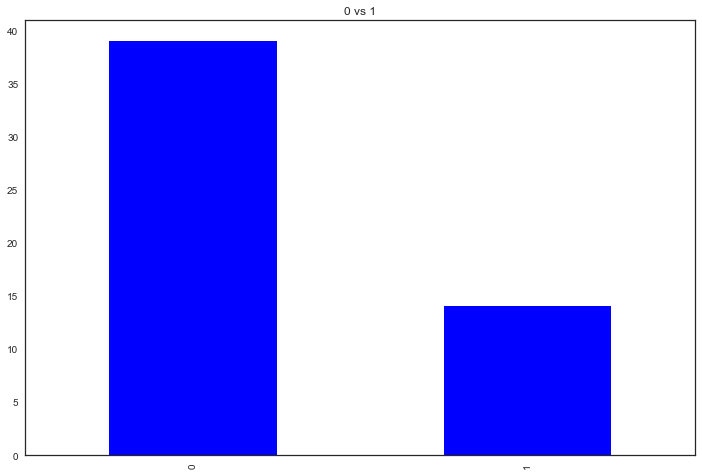

In [188]:
from sklearn.preprocessing import StandardScaler

X = df[['Change_log','Change','Price','News_Volume', 'News_Buzz',
       'Sentiment_High', 'Sentiment_Low']]

ss = StandardScaler()
Xs = ss.fit_transform(X)

y = df['Sentiment_Dummy']

print (df['Sentiment_Dummy'].value_counts())

# Plot classes

plt.figure(figsize=(12,8))
df['Sentiment_Dummy'].value_counts().plot(kind='bar',
                                                       title='0 vs 1', color='blue')
plt.show()

In [189]:
# New issue, possible overgrouping of 1 

In [190]:
# Let's run a gridsearch and Lasso looking to improve my model: 

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, LassoCV

# Logistic Regression

# Set parameters for gridsearching

gs_params = {
    'penalty':['l1','l2'],
    'solver':['liblinear'],
    'C':np.logspace(-5,0,10)
}

# pass gridsearching with logistic regression and parameters

lr_gridsearch = GridSearchCV(LogisticRegression(), gs_params, cv=5, verbose=1)
print (lr_gridsearch)

lr_gridsearch.fit(X, y)

# print optimal logreg scores and parameters
print (lr_gridsearch.best_score_)
print (lr_gridsearch.best_params_)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'solver': ['liblinear'], 'C': array([  1.00000e-05,   3.59381e-05,   1.29155e-04,   4.64159e-04,
         1.66810e-03,   5.99484e-03,   2.15443e-02,   7.74264e-02,
         2.78256e-01,   1.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)
Fitting 5 folds for each of 20 candidates, totalling 100 fits
0.830188679245
{'C': 0.0059948425031894088, 'penalty': 'l2', 'solver': 'liblinear'}


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


In [191]:
# Gridsearch looking to improve my model: 

best_lr = lr_gridsearch.best_estimator_

print (best_lr.score(X, y))

coef_df = pd.DataFrame({
        'coefficient':np.abs(best_lr.coef_[0]),
        'feature':X.columns})

coef_df.sort_values('coefficient',ascending=False)

# Not good at all

0.905660377358


,coefficient,feature
3,0.114899,News_Volume
4,0.096093,News_Buzz
6,0.046030,Sentiment_Low
5,0.022135,Sentiment_High
2,0.018917,Price
0,0.014255,Change_log
1,0.009495,Change


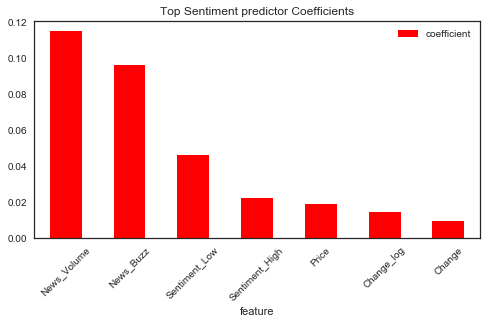

In [192]:
# Logistic Regression coefficient plots:

coef_df.sort_values('coefficient',ascending=False).plot(kind='bar',
                                                                 x='feature',
                                                                 figsize=(8,4),
                                                                 rot=45,
                                                                 color='red',
                                                                 title="Top Sentiment predictor Coefficients")

In [193]:
from sklearn.metrics import classification_report, confusion_matrix

# Setup the logistic regression model with hyperparameters for Part-01 Overall Features logistic regression model.

lr = LogisticRegression(penalty='l2', C=0.0059948425031894088, solver='liblinear')

# Investigate model accuracy:

scores = cross_val_score(lr, X, y, cv=10)
print (scores)
print (np.mean(scores))

# Fit model with predictors and salary target

lr.fit(X, y)

# Create predicted y values

ysent = lr.predict(X)
ysent_pp = lr.predict_proba(X)

# Sum all the true/false positives/negatives combinations

tp = np.sum((y == 1) & (ysent == 1))
fp = np.sum((y == 0) & (ysent == 1))
tn = np.sum((y == 0) & (ysent == 0))
fn = np.sum((y == 1) & (ysent == 0))

# convert the predicted and actual values to a confusion array

confusion_array = np.array(confusion_matrix(y, ysent, labels=[1,0]))

confusion = pd.DataFrame(confusion_array, index=['Sentiment', 'no Sentiment'],
                         columns=['predicted_Sentiment','predicted_no_Sentiment'])
confusion

[ 0.33333333  0.66666667  1.          1.          1.          1.          1.
  1.          1.          0.75      ]
0.875


,predicted_Sentiment,predicted_no_Sentiment
Sentiment,13,1
no Sentiment,4,35


#### Logistic Regression Visualization 

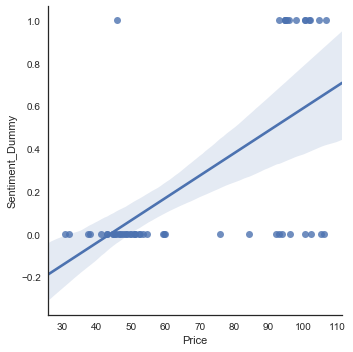

In [194]:
# Big problem with my logistic regression 
sns.lmplot(x="Price", y="Sentiment_Dummy", data=df);
# My data is extremly group it in 1 
# I'll double check below 

In [195]:
# Some nice colors we can use in our plots:
colors = {'blue': '#729ECE',
          'brown': '#A8786E',
          'green': '#67BF5C',
          'grey': '#A2A2A2',
          'orange': '#FF9E4A',
          'pink': '#ED97CA',
          'purple': '#AD8BC9',
          'red': '#ED665D',
          'teal': '#6DCCDA',
          'yellow': '#CDCC5D'}

In [196]:
y = df.Sentiment_Dummy
X = df[['Price']].values

logreg = LogisticRegression()
logreg.fit(X, y)

print ('Logreg intercept:', logreg.intercept_)
print ('Logreg coef(s):', logreg.coef_)
print ('Logreg predicted probabilities:', logreg.predict_proba(X[0:5,:]))

Logreg intercept: [-2.60213694]
Logreg coef(s): [[ 0.02527759]]
Logreg predicted probabilities: [[ 0.55109575  0.44890425]
 [ 0.54801085  0.45198915]
 [ 0.56276904  0.43723096]
 [ 0.56829212  0.43170788]
 [ 0.5516823   0.4483177 ]]


In [197]:
xval_chance = (-1 * logreg.intercept_[0])/logreg.coef_[0][0]
print (xval_chance*logreg.coef_[0][0] + logreg.intercept_)
print (xval_chance)

logreg.predict_proba([[xval_chance]])

[ 0.]
102.942435078


array([[ 0.5,  0.5]])

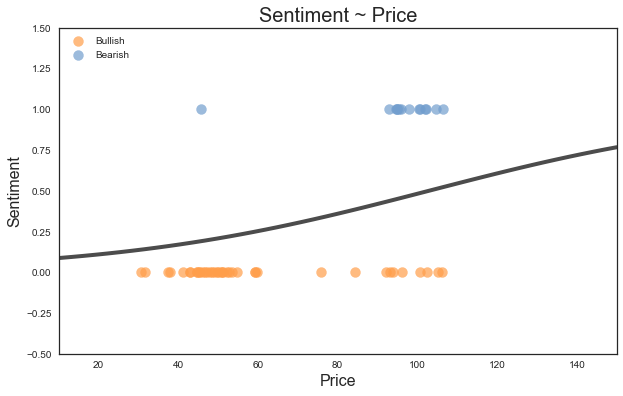

In [198]:
fig, ax = plt.subplots(figsize=(10,6))

# plot the Logistic Regression for Sentiment_Dummy ~ Price
x_vals = np.linspace(1,150)
y_pp = logreg.predict_proba(x_vals[:, np.newaxis])[:,1]
        
ax.plot(x_vals, y_pp, color='black', alpha=0.7, lw=4)

# scatter plot for Bullish and Bearish (Sentiment_Dummy) :
ax.scatter(df.Price[df.Sentiment_Dummy == 0],
           df.Sentiment_Dummy[df.Sentiment_Dummy == 0],
           c=colors['orange'], s=100, alpha=0.7,
           label='Bullish')

ax.scatter(df.Price[df.Sentiment_Dummy == 1],
           df.Sentiment_Dummy[df.Sentiment_Dummy == 1],
           c=colors['blue'], s=100, alpha=0.7,
           label='Bearish')

ax.set_ylabel('Sentiment', fontsize=16)
ax.set_xlabel('Price', fontsize=16)
ax.set_title('Sentiment ~ Price', fontsize=20)

ax.set_xlim([10,150])
ax.set_ylim(-0.5, 1.5)

plt.legend(loc='upper left')
plt.show()

##### Possible solution: Clustering Analysis 

#### Add a third dataset : 
Adding more predictors with this new dataset. However, if the predictors have realistic priors, their coefficient will be correctly pulled down. ( Possible overfitting) 

In [199]:
#Third Data Set:
oil_balance = './Dataset/World_Fuel.csv'
oil_balance = pd.read_csv('./Dataset/World_Fuel.csv')

In [200]:
# Check
oil_balance.head()
oil_balance = oil_balance.rename(columns={'Category':'Date'})

In [201]:
##Create a Dictionary for the third DATASET "sent"
oil_balance_dict = {
    'World_production ':{
        'type':oil_balance.World_production.dtype,
        'description':'Average Oil World production in million barrels per day '
    },
    'World_consumption':{
        'type':oil_balance.World_consumption.dtype,
        'description':'Average Oil World consumption in million barrels per day'
    },'dataset_shape':oil_balance.shape}

print(oil_balance_dict)

{'World_production ': {'type': dtype('float64'), 'description': 'Average Oil World production in million barrels per day '}, 'World_consumption': {'type': dtype('float64'), 'description': 'Average Oil World consumption in million barrels per day'}, 'dataset_shape': (28, 4)}


In [202]:
# Check 
oil_balance.dtypes

Date                              object
Change_Production_Consumption    float64
World_production                 float64
World_consumption                float64
dtype: object

In [203]:
oil_balance.head()

,Date,Change_Production_Consumption,World_production,World_consumption
0,2012Q1,0.928672,90.739492,89.810820
1,2012Q2,0.386495,90.610009,90.223514
2,2012Q3,-1.071127,90.628467,91.699594
3,2012Q4,-1.533823,91.093316,92.627139
4,2013Q1,-1.060316,90.114458,91.174774


In [204]:
# Creating a datetime 
oil_balance['Date']= pd.to_datetime(oil_balance['Date'])

In [205]:
# Check
oil_balance.head()

,Date,Change_Production_Consumption,World_production,World_consumption
0,2012-01-01,0.928672,90.739492,89.810820
1,2012-04-01,0.386495,90.610009,90.223514
2,2012-07-01,-1.071127,90.628467,91.699594
3,2012-10-01,-1.533823,91.093316,92.627139
4,2013-01-01,-1.060316,90.114458,91.174774


In [206]:
#To CSV for a future reference.
#oil_balance.to_csv('oil_balance_Tableau.csv')

In [207]:
# Making my datetime column the index
oil_balance.index = oil_balance.Date

In [208]:
# Check
oil_balance.head(10)

,Date,Change_Production_Consumption,World_production,World_consumption
Date,,,,
2012-01-01,2012-01-01,0.928672,90.739492,89.810820
2012-04-01,2012-04-01,0.386495,90.610009,90.223514
2012-07-01,2012-07-01,-1.071127,90.628467,91.699594
2012-10-01,2012-10-01,-1.533823,91.093316,92.627139
2013-01-01,2013-01-01,-1.060316,90.114458,91.174774
2013-04-01,2013-04-01,-0.621547,91.210812,91.832359
2013-07-01,2013-07-01,-1.165035,91.855884,93.020919
2013-10-01,2013-10-01,-1.313407,91.931091,93.244499
2014-01-01,2014-01-01,-0.649701,92.249656,92.899358


In [209]:
oil_balance.drop(axis=1,labels='Date',inplace=True)
del oil_balance.index.name

In [210]:
oil_balance.head(3)

,Change_Production_Consumption,World_production,World_consumption
2012-01-01,0.928672,90.739492,89.810820
2012-04-01,0.386495,90.610009,90.223514
2012-07-01,-1.071127,90.628467,91.699594


In [211]:
# Let's have a closer look to the world oil production and consumption 

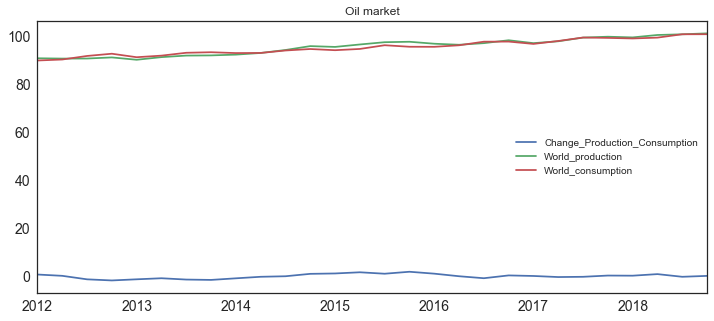

In [212]:
oil_balance.plot(figsize=(12,5), title= 'Oil market', fontsize=14)
plt.show()

#####  As expected world consumption and production are positive correlated. 

In [213]:
### Check again
result.columns

Index(['Price', 'Open', 'High', 'Low', 'Volume', 'Change', 'Sentiment',
       'Sentiment_High', 'Sentiment_Low', 'News_Volume', 'News_Buzz'],
      dtype='object')

In [214]:
# For later research
result_oil = result[['Price', 'Open', 'High', 'Low', 'Volume', 'Change']]

In [215]:
result_oil.head()

,Price,Open,High,Low,Volume,Change
2013-01-01,94.828571,94.583333,95.345714,93.973810,2.083390e+07,0.288571
2013-02-01,95.321579,95.611053,96.240526,94.547368,2.168042e+07,-0.298421
2013-03-01,92.957000,92.681500,93.499000,91.983000,2.013805e+07,0.277000
2013-04-01,92.067727,92.199091,92.970909,90.800000,2.467755e+07,-0.168182
2013-05-01,94.734762,94.662857,95.515238,93.346667,2.793929e+07,-0.024286


In [216]:
#result

In [217]:
# Resampling the in quarters per year 
result_quaterly= result.resample('QS').agg({'Price': np.mean,'Change': np.mean,'Volume':np.mean ,'Sentiment':np.mean,
                                            'News_Volume':np.mean, 'News_Buzz':np.mean})


In [218]:
# Check
result_quaterly.head()

,Price,Change,Volume,Sentiment,News_Volume,News_Buzz
2013-01-01,94.369050,0.089050,2.088413e+07,-0.749498,3.553143,6.558880
2013-04-01,94.200996,0.019344,2.573369e+07,-0.321864,7.813978,4.693620
2013-07-01,105.824409,0.099742,2.382853e+07,-0.754122,8.916487,5.009677
2013-10-01,97.459465,-0.051084,2.077962e+07,-0.752688,8.907706,5.125627
2014-01-01,98.680326,0.062774,2.132302e+07,-0.042435,6.976767,6.141513


In [219]:
# Merged the three datasets
result_final= pd.merge(result_quaterly,oil_balance, how='inner', left_index=True, right_index=True)

In [220]:
# Checks
result_final.head(200)

,Price,Change,Volume,Sentiment,News_Volume,News_Buzz,Change_Production_Consumption,World_production,World_consumption
2013-01-01,94.369050,0.089050,2.088413e+07,-0.749498,3.553143,6.558880,-1.060316,90.114458,91.174774
2013-04-01,94.200996,0.019344,2.573369e+07,-0.321864,7.813978,4.693620,-0.621547,91.210812,91.832359
2013-07-01,105.824409,0.099742,2.382853e+07,-0.754122,8.916487,5.009677,-1.165035,91.855884,93.020919
2013-10-01,97.459465,-0.051084,2.077962e+07,-0.752688,8.907706,5.125627,-1.313407,91.931091,93.244499
2014-01-01,98.680326,0.062774,2.132302e+07,-0.042435,6.976767,6.141513,-0.649701,92.249656,92.899358
2014-04-01,102.992063,0.062381,2.097651e+07,-1.052509,9.461111,6.311649,-0.011368,92.938292,92.949660
2014-07-01,97.167431,-0.210440,2.388927e+07,-1.437993,10.056452,5.879211,0.207881,94.174434,93.966553
2014-10-01,73.146225,-0.706083,3.059966e+07,-2.958781,29.085484,5.922222,1.208888,95.788421,94.579533
2015-01-01,48.634776,-0.152325,3.868185e+07,-2.755760,38.205453,6.972734,1.367667,95.453862,94.086195
2015-04-01,57.942911,0.379455,3.260137e+07,-2.333731,18.107178,6.599125,1.857142,96.468206,94.611064


In [221]:
result_test = result_final[[]]

In [222]:
#result_final['Date'] = result_final.index
#result_final.head()

In [223]:
#To CSV for a future reference.
result_final.to_csv('result_final_Tableau.csv')

In [224]:
#Run a correlation for Price (sort it ascending)
mean_corr3 = result_final.corr()
mean_corr3['Price'].sort_values(ascending=False)

Price                            1.000000
Sentiment                        0.787182
Change                           0.027191
News_Buzz                       -0.402903
News_Volume                     -0.649582
Change_Production_Consumption   -0.668828
World_consumption               -0.810175
World_production                -0.896068
Volume                          -0.896505
Name: Price, dtype: float64

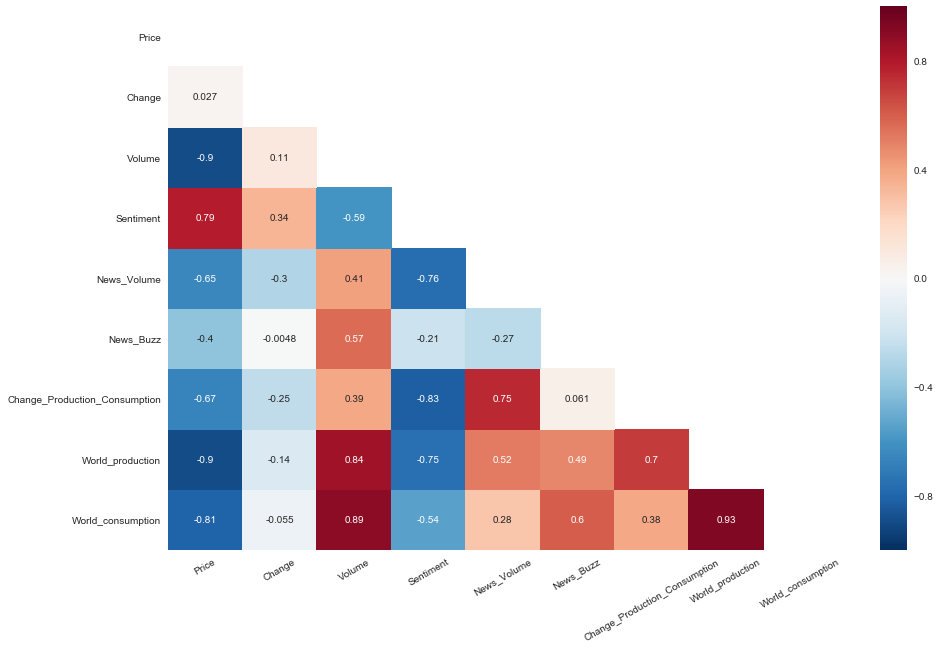

In [225]:
#Plot a heatmap to see the correlation between the variables
corrs = result_final.corr()
# Set the default matplotlib figure size:
fig, ax = plt.subplots(figsize=(15,10))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(result_final.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(corrs, mask=mask, annot=True)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10, rotation=30)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10, rotation=0)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

##### Fascinating correlation map, showing high positive relation between prices and sentiment (others interesting correlations between variables as well) 


In [226]:
# Check 
result_final.describe()

,Price,Change,Volume,Sentiment,News_Volume,News_Buzz,Change_Production_Consumption,World_production,World_consumption
count,18.000000,18.000000,1.800000e+01,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,68.558130,-0.033531,3.599813e+07,-1.689032,18.054157,8.501904,0.266589,95.020739,94.754149
std,26.000279,0.253520,1.315823e+07,0.933829,13.630341,5.482433,1.055680,2.622111,2.028601
min,33.451066,-0.706083,2.077962e+07,-3.083333,3.553143,4.693620,-1.313407,90.114458,91.174774
25%,46.979765,-0.149684,2.384372e+07,-2.409326,8.909901,5.889964,-0.618832,92.421815,93.076814
50%,54.930528,0.008580,3.459701e+07,-1.699173,10.566234,6.524960,0.211094,96.066402,94.595299
75%,96.467836,0.082481,5.041963e+07,-0.828719,25.854888,8.059285,1.246211,97.021448,96.146069
max,105.824409,0.392720,5.382683e+07,-0.042435,49.416667,25.293011,2.075141,98.221469,97.917239


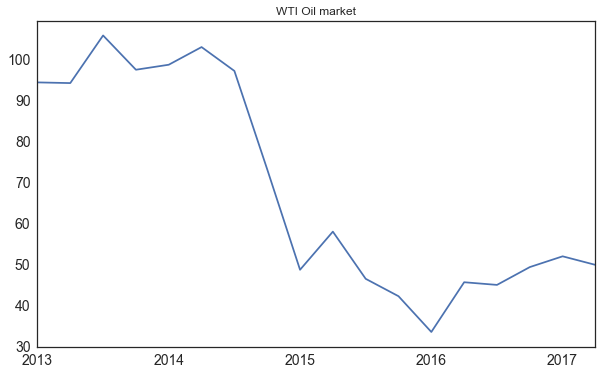

In [227]:
result_final.Price.plot(figsize=(10,6), title= 'WTI Oil market', fontsize=14)
plt.show()

In [228]:
#partial index is 2017
#result_14 = result_final['2017']
#do partial for 2017 to 2016
#df_vow['2017':'2016']

In [229]:
#result_14.head()

In [230]:
result_final.columns

Index(['Price', 'Change', 'Volume', 'Sentiment', 'News_Volume', 'News_Buzz',
       'Change_Production_Consumption', 'World_production',
       'World_consumption'],
      dtype='object')

In [231]:
from scipy.stats import kurtosis

In [232]:
kurtosis(result_final)

array([-1.67222304,  1.19389752, -1.56767876, -1.17386185, -0.23509413,
        3.45287584, -1.15028793, -1.22115207, -1.02548912])

### Linear Regression 

In [233]:
# Let's look at the price of oil specifically as our target.
# I want to see if these variables are related to the oil price movement 
# I'll use statsmodels so I can get the summary.

In [234]:
#dlog = result_final[(result_final.index > "2012-11-01") & (dlog.index < "2014-11-01")]

In [235]:
f = 'Price ~ Sentiment + News_Volume + News_Buzz + World_production + World_consumption + Change_Production_Consumption'
model = smf.ols(f, data=result_final)
resultsf = model.fit()

In [236]:
resultsf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     15.94
Date:                Wed, 07 Jun 2017   Prob (F-statistic):           7.61e-05
Time:                        20:23:06   Log-Likelihood:                -63.227
No. Observations:                  18   AIC:                             140.5
Df Residuals:                      11   BIC:                             146.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       668.6976    174.573      3.830      0.003     284.466    1052.929
Sentiment                         2.4501      6.432      0.381      0.711     -11.708      16.608
News_Volume                      -0.9207      0.426     -2.164      0.053      -1.857       0.016
News_Buzz                        -0.9290      0.816     -1.139      0.279      -2.724       0.866
World_production              -8.116e+08   6.65e+08     -1.221      0.248   -2.27e+09    6.52e+08
World_consumption              8.116e+08   6.65e+08      1.221      0.248   -6.52e+08    2.27e+09
Change_Production_Consumption  8.116e+08   6.65e+08      1.221      0.248   -6.52e+08    2.27e+09
==============================================================================
Omnibus:                        0.085   Durbin-Watson:                   1.218
Prob(Omnibus):                  0.958   Jarque-Bera (JB):                0.302
Skew:                          -0.080   Prob(JB):                        0.860
Kurtosis:                       2.386   Cond. No.                     6.39e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.13e-17. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [237]:
#To CSV for a future reference.
result_final.to_csv('result_final_capstone.csv')

In [238]:
# I'm going to extract the residuals out of this model:
resids = results.resid

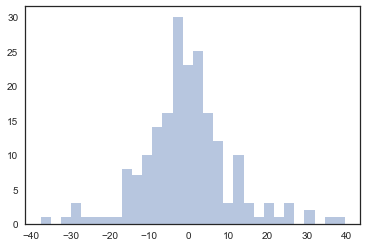

In [239]:
sns.distplot(resids, kde=False, bins=30)

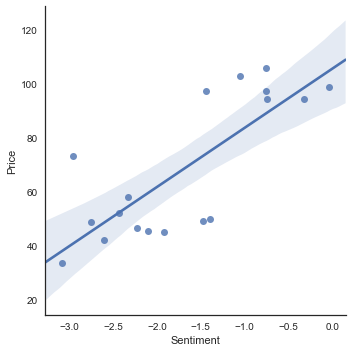

In [240]:
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

sns.lmplot(x='Sentiment', y='Price', data=result_final)
plt.show()

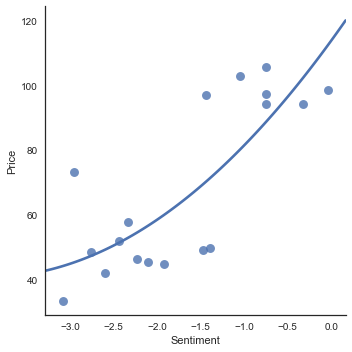

In [241]:
# Trying to use a polynomical regression (degree 2)
sns.lmplot(x='Sentiment', y='Price', data=result_final,
           order= 2, ci=None, scatter_kws={"s": 80});
# It looks way better 
# Still big pressence of ouliers 

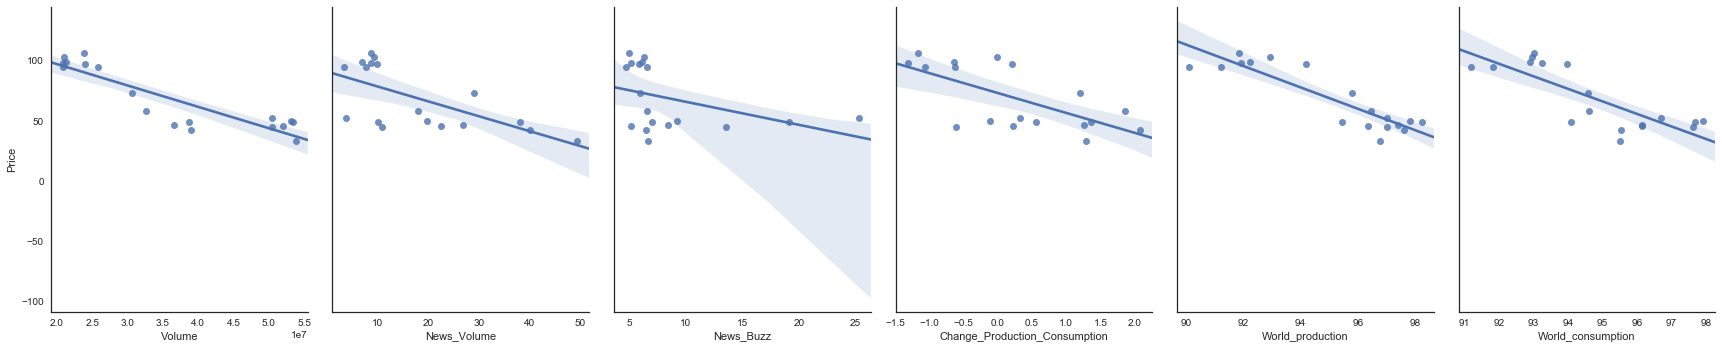

In [242]:
#Combine set of linear regressions
sns.pairplot(result_final, x_vars=['Volume','News_Volume', 'News_Buzz',
       'Change_Production_Consumption', 'World_production',
       'World_consumption'], y_vars=["Price"],
             size=5, aspect=.8, kind="reg");

In [243]:
### Logistic regression for this dataset

In [244]:
result_final.head()

,Price,Change,Volume,Sentiment,News_Volume,News_Buzz,Change_Production_Consumption,World_production,World_consumption
2013-01-01,94.369050,0.089050,2.088413e+07,-0.749498,3.553143,6.558880,-1.060316,90.114458,91.174774
2013-04-01,94.200996,0.019344,2.573369e+07,-0.321864,7.813978,4.693620,-0.621547,91.210812,91.832359
2013-07-01,105.824409,0.099742,2.382853e+07,-0.754122,8.916487,5.009677,-1.165035,91.855884,93.020919
2013-10-01,97.459465,-0.051084,2.077962e+07,-0.752688,8.907706,5.125627,-1.313407,91.931091,93.244499
2014-01-01,98.680326,0.062774,2.132302e+07,-0.042435,6.976767,6.141513,-0.649701,92.249656,92.899358


#### PCA model 

In [248]:
# New definition 
result_final_pca = result_final[['Price','Volume', 'Sentiment', 'News_Volume', 'News_Buzz','World_production',
       'World_consumption']]

In [249]:
# Check 
result_final_pca.head(2)

,Price,Volume,Sentiment,News_Volume,News_Buzz,World_production,World_consumption
2013-01-01,94.369050,2.088413e+07,-0.749498,3.553143,6.55888,90.114458,91.174774
2013-04-01,94.200996,2.573369e+07,-0.321864,7.813978,4.69362,91.210812,91.832359


In [250]:
pca_cols = result_final_pca.columns
print (pca_cols)

Index(['Price', 'Volume', 'Sentiment', 'News_Volume', 'News_Buzz',
       'World_production', 'World_consumption'],
      dtype='object')


In [251]:
pca = result_final_pca[pca_cols]
pca = (pca - pca.mean()) / pca.std()

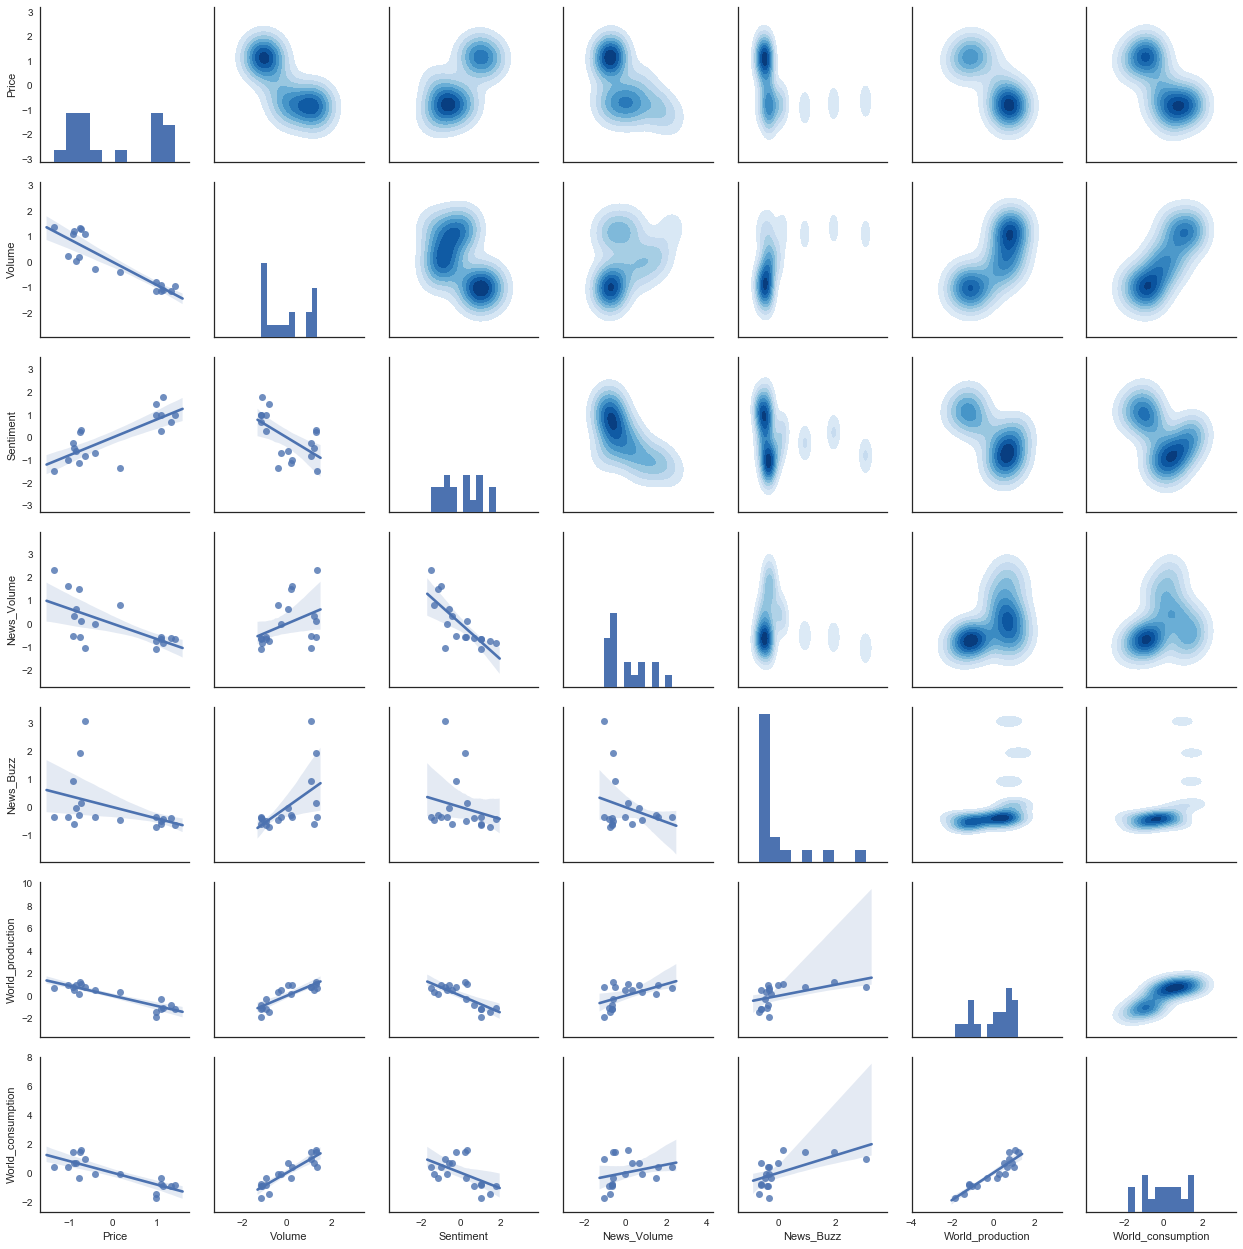

In [252]:
g = sns.PairGrid(pca)
g = g.map_lower(sns.regplot)    # regression plots in lower tri
g = g.map_upper(sns.kdeplot, cmap="Blues", shade=True, shade_lowest=False)  # KDE plots in upper tri
g = g.map_diag(plt.hist)        # histograms along diagonal

plt.show()

In [253]:
from sklearn.decomposition import PCA
variables_pca = PCA(n_components=7)
variables_pca.fit(pca.values)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [254]:
pca_components = variables_pca.components_

In [255]:
print (pca_cols, '\n')
print ('-------------------------------------\n')

for i, pc in enumerate(['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7']):
    print (pc, 'weighting vector:', pca_components[i])
    print( '-------------------------------------\n')

Index(['Price', 'Volume', 'Sentiment', 'News_Volume', 'News_Buzz',
       'World_production', 'World_consumption'],
      dtype='object') 

-------------------------------------

PCA1 weighting vector: [ 0.4401938  -0.4215367   0.37126314 -0.27024147 -0.2343787  -0.43994544
 -0.41131994]
-------------------------------------

PCA2 weighting vector: [ 0.08611846  0.15469126  0.32620133 -0.63460145  0.62975116  0.03531763
  0.2483829 ]
-------------------------------------

PCA3 weighting vector: [ 0.08666408 -0.31291902 -0.64051779  0.01414573  0.56922082 -0.10493091
 -0.38611532]
-------------------------------------

PCA4 weighting vector: [-0.34079273  0.54511341  0.21327218  0.20785758  0.20582242 -0.53105991
 -0.4166946 ]
-------------------------------------

PCA5 weighting vector: [-0.06511852  0.33455073 -0.52305481 -0.61771677 -0.41574116 -0.2360567
  0.01056228]
-------------------------------------

PCA6 weighting vector: [-0.78240575 -0.41202677  0.14637415 -0.29430538 -0.07

In [256]:
vari_exp_eigenvals = variables_pca.explained_variance_
vari_exp_pct = variables_pca.explained_variance_ratio_

print ('eigenvalues:', vari_exp_eigenvals, '\n')
print ('explained variance pct:', vari_exp_pct)

eigenvalues: [ 4.52231163  1.42385484  0.34120994  0.18316155  0.07335376  0.05330275
  0.01391665] 

explained variance pct: [ 0.68404714  0.215373    0.05161159  0.02770511  0.01109553  0.0080626
  0.00210504]


In [257]:
vari_to_pcs = variables_pca.transform(pca.values)

In [258]:
# This transforms our dimension of the data
# The first row is the first person's subjective.values transformed.
vari_to_pcs[:,:5]

array([[ 3.21422665,  0.18360665,  0.46186637,  0.68496222,  0.25239914],
       [ 2.90401807,  0.07209107, -0.30561534,  0.6235655 , -0.01033267],
       [ 2.60539155,  0.07638851, -0.14315767, -0.05254396,  0.02841624],
       [ 2.49928077,  0.05545489, -0.13305131, -0.12582226, -0.042957  ],
       [ 2.79630292,  0.48261392, -0.47265475,  0.05796678, -0.45002801],
       [ 2.29655688,  0.059298  ,  0.22588305, -0.34911933, -0.09109891],
       [ 1.54446806,  0.00336101,  0.11430538, -0.70653746,  0.11328569],
       [-0.45601916, -1.31276954,  0.76072666, -0.62200922,  0.18813116],
       [-1.11877613, -1.59687127,  0.57339159,  0.42807088, -0.12412564],
       [-0.46076816, -0.51935505,  0.25940516, -0.4832148 ,  0.31216425],
       [-1.46489602, -0.47422274, -0.07893659, -0.44683454, -0.2319875 ],
       [-1.84149291, -1.5018918 ,  0.03326814, -0.16044188, -0.42561236],
       [-2.70796584, -1.95257891,  0.04357445,  0.78016054, -0.11291742],
       [-1.51176237, -0.44768914, -0.8

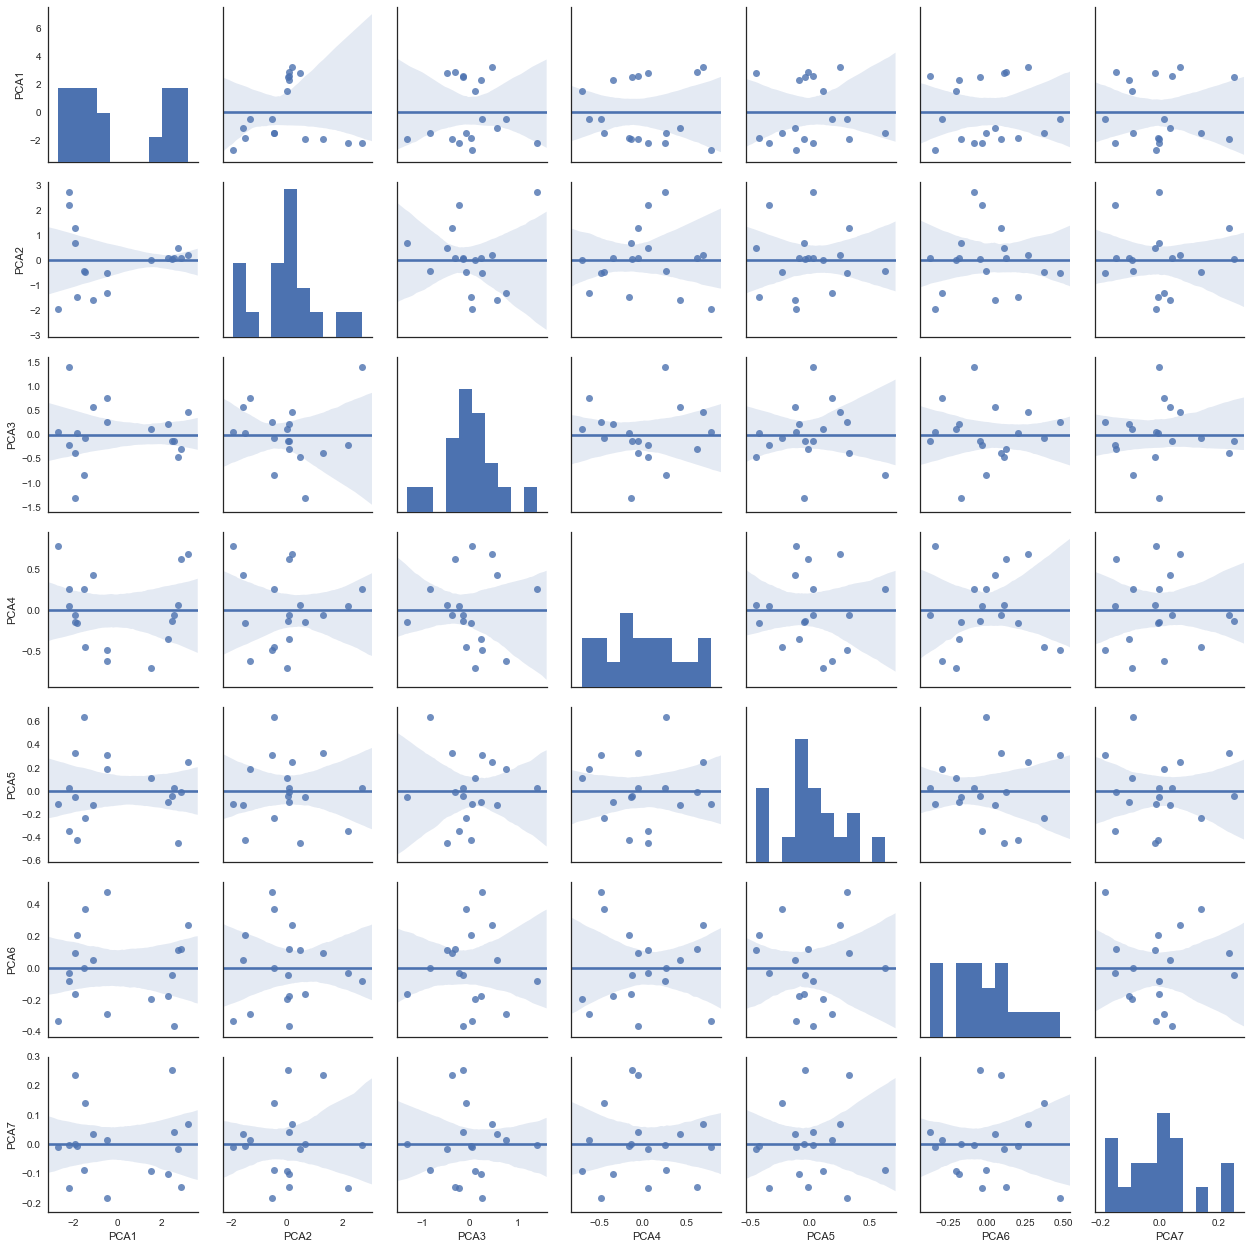

In [259]:
sns.pairplot(pd.DataFrame(vari_to_pcs, columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7']), kind='reg');

##### Disaster! 

In [260]:
vari_to_pcs[:,0:1].shape

(18, 1)

In [261]:
price_pca = result_final_pca['Price'].values

In [262]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

pca_linreg = LinearRegression()
pca_scores = cross_val_score(pca_linreg, vari_to_pcs[:,0:5], price_pca, cv=7)
print (pca_cols)
print (pca_scores)
print (np.mean(pca_scores))

Index(['Price', 'Volume', 'Sentiment', 'News_Volume', 'News_Buzz',
       'World_production', 'World_consumption'],
      dtype='object')
[ -1.09792862  -0.63772012   0.79439269  -2.83064122  -2.55527759
  -1.23686155 -17.41030459]
-3.56776299836


In [263]:
pca_linreg = LinearRegression()
pca_scores = cross_val_score(pca_linreg, vari_to_pcs[:,0:5], price_pca, cv=7)
print (pca_scores)
print (np.mean(pca_scores))

[ -1.09792862  -0.63772012   0.79439269  -2.83064122  -2.55527759
  -1.23686155 -17.41030459]
-3.56776299836


##### PCA Model not helpful at all. 

#### Findings: 
1. Promising predictive power of sentiment analysis
2. Inherent Volatility as a result of shocks in the oil market, make hard to forecast prices using time series analysis
3. Categorical variables of sentiment data highly group it in bearish markets, which create statistical problems in my project. 
4. Promising future research in natural language processing as a way to analyse and forecast oil prices.
5. News, Blogs and Twitter data might have a measurable impact in oil prices
6. Raw data abnormalities create a big barrier for accuracy in our model.

#### Target Audience: 
1. Financial data vendor
2. Goverments 
3. Mutual Funds
4. Rating Agencies 
5. Individual Investors 
6. Investment Banks 
7. Emerging Markets Funds 

#### Strength: 
1. Wide range of different methods, models and datasets where use in this model, strengthening its predictive power, research and value.
2. Correlations heat maps and Linear regression model findings are promising 
3. Time Series analysis might lead to short time forecasts
4. Valuable research for further analysis in natural language processing 
5. Visualization and resampling methods provided good insights about oil prices behaviour.

#### Weaknesses: 
1. The main risk is missing dates in between both sets of data and interpolation might represent a significant issue in the analysis.
2. Another risk is the EDA cleaning process; it might reduce significantly our Data leading to wrong conclusions.
3. Regression problems (i.e multicollinearity, non-normality.........)
4. Misleading news or wrong Data.
5. Wrong "Economic behavior" assumptions.
6. Oil price Volatility 
7. Time Constrain, Budget Constrain. 

#### Recommendations for stakeholders & summarizing next steps: 
The project has a lot of potential. Further analysis in natural language process applied to blogs, news and twitter might find relevant correlation with oil prices.

1. Re-extract datasets with complete information. 
2. Applied other models such as: 
        * Theil-Sen
             * Ransac
                 * Huber
3. Extract a bigger sample of blogs and news. 
4. Extract twitter news related to oil prices. 
5. NLTK looking for the most relevant words by week or month, and revaluate their correlations with changes in the oil prices. 
        1. Running change in price.
        2. Take the price data frame
        3. Add a column called “next week”
        4. Merge the data frame with itself on “date” (left) and “next week” (right)
        5. Add a column for the price movement over the week
        6. Regress price movement against news sentiment
6. Further research’s in sentiment analysis.

### Conclusion: 

The project confirms to some extent the valid and predictive power of sentiment analysis to understand and forecast oil price trends. The method itself needs to be improved, reinforced and researched in more depth by looking at three different perspectives. Firstly, building a sentiment analysis dictionary, testing it in real time, and comparing it to WTI oil prices. Secondly, mining all the relevant information from the media, such as from the online news articles (This is an essential factor). Thirdly, an explorative comparison between oil prices and sentiment data that emphasize the study of points and intervals but also maintain accuracy. And ultimately, to consider the use of hybrid algorithms to increase the prediction performance. Nevertheless, it is useful to research about behavioral finance, anchoring and over pessimistic conducts that placed too much importance on recent events while ignored historical data.